## Setup

In [32]:
%run ../setup.ipynb

## Carico dati per l'analisi

In [33]:
# cartella dove ci sono i dati da analizzare
folder = "../setup_dati/"

# importo dati
df_all = pd.read_csv(folder+"df_all_data.csv", sep=',').drop(columns=['Unnamed: 0'])
df_all["doc_index"] = df_all["doc_index"].apply(str)

In [34]:
# importo df con i dati dei workers
df_workers_answer =  pd.read_csv("../../data/prolific/Dataframe/workers_questionnaire.csv", sep=',')
 
# visualizzo dati
df_workers_answer[["worker_id","questionnaire_index","question_attribute_name","question_attribute_text","question_answer_value","question_answers_labels","question_answer_text",'question_answer_mapping_index', 'question_answer_mapping_key',
       'question_answer_mapping_label', 'question_answer_mapping_value']]

worker_id  questionnaire_index question_attribute_name  \
0     62c61250e85c96fc1794c7db                  0.0                     age   
1     62c61250e85c96fc1794c7db                  0.0                  school   
2     62c61250e85c96fc1794c7db                  0.0                   taxes   
3     62c61250e85c96fc1794c7db                  0.0         political_views   
4     62c61250e85c96fc1794c7db                  0.0           consideration   
...                        ...                  ...                     ...   
6185  629e3b29a4c6a6994feefef8                  2.0                k_info_2   
6186  629e3b29a4c6a6994feefef8                  2.0                k_info_3   
6187  629e3b29a4c6a6994feefef8                  2.0                k_crea_2   
6188  629e3b29a4c6a6994feefef8                  2.0                  k_ai_2   
6189  629e3b29a4c6a6994feefef8                  2.0                  k_ai_4   

                                question_attribute_text  \
0                               What is your age range?   
1     What is the highest level of school you have c...   
2     Last year what was your total family income fr...   
3     In general, would you describe your political ...   
4         In politics today, do you consider yourself a   
...                                                 ...   
6185  Everyone gets the same information when they s...   
6186  Some people make money by spreading fake news ...   
6187  Some people are paid to use products in the vi...   
6188  Websites and apps for news and entertainment s...   
6189  Some people are paid to use products in the vi...   

      question_answer_value  \
0                       2.0   
1                       3.0   
2                       2.0   
3                       3.0   
4                       1.0   
...                     ...   
6185                    3.0   
6186                    2.0   
6187                    2.0   
6188                    3.0   
6189                    2.0   

                                question_answers_labels  \
0            0-18:::19-25:::26-35:::36-50:::51-80:::81+   
1     High school incomplete or less:::High school g...   
2     Less than 10,000$:::10,000$ to less than 20,00...   
3     Very conservative:::Conservative:::Moderate:::...   
4     Republican:::Democrat:::Independent:::Somethin...   
...                                                 ...   
6185                                                NaN   
6186                                                NaN   
6187                                                NaN   
6188                                                NaN   
6189                                                NaN   

                              question_answer_text  \
0                                            26-35   
1     Four year college degree/bachelorâs degree   
2                     20,000$ to less than 30,000$   
3                                          Liberal   
4                                         Democrat   
...                                            ...   
6185                                           NaN   
6186                                           NaN   
6187                                           NaN   
6188                                           NaN   
6189                                           NaN   

      question_answer_mapping_index question_answer_mapping_key  \
0                               NaN                         NaN   
1                               NaN                         NaN   
2                               NaN                         NaN   
3                               NaN                         NaN   
4                               NaN                         NaN   
...                             ...                         ...   
6185                            2.0                   dont_know   
6186                            1.0             definetely_true   
6187                         

notiamo che :
- se questionnaire_index = 0 -> risposta in question_answers_labels e question_answer_text

- se questionnaire_index = 1 -> risposta in question_answer_mapping_index e question_answer_mapping_key

        domanda = question_attribute_text
        risposta con index -> key :
        0 -> definetely_untrue
        1 -> slightly_untrue
        2 -> not_true_and_not_untrue
        3 -> slightly_true
        4 -> completely_true
        5 -> completely_untrue
        6 -> not_answer

- se questionnaire_index = 2 -> risposta in question_answer_mapping_index e question_answer_mapping_key

        domanda = question_attribute_text
        risposta con index -> key :
        0 -> definetely_untrue
        1 -> definetely_true
        2 -> dont_know
        3 -> dont_understand

In [35]:
for attribute in df_workers_answer["question_attribute_name"].unique():
    print(attribute,":",df_workers_answer[df_workers_answer["question_attribute_name"] == attribute]["question_attribute_text"].unique()[0])
    

age : What is your age range?
school : What is the highest level of school you have completed or the highest degree you have received?
taxes : Last year what was your total family income from all sources, before taxes?
political_views : In general, would you describe your political views as
consideration : In politics today, do you consider yourself a
southern_border : Should the U.S. Government build a wall along the southern border?
environment : Should the U.S. Government adopt better policies to prevent climate change?
s_info_1 : I know how to choose good keywords for online searches (for example with Google)
s_info_3_v2 : I know how I can find answers to my questions on the internet
s_info_4 : I know how I can use search functions in search engines (for example with Google)
s_info_5 : I know how I can check if the information I find on the internet is true
s_info_6 : I know how I can check if a website is reliable
s_info_7 : I can assess what the goal of online information is (e.g

In [36]:
# filtro i workers che hanno risposto a tutte le domande
lista_worker = df_all["worker_id"].unique()
sub = df_workers_answer[df_workers_answer["worker_id"].isin(lista_worker)]

In [37]:
len(lista_worker)

200

In [38]:
df_momentaneo = {}

for id in lista_worker: 
    df_momentaneo[id] = {"age_ans_index" : 0,
              "age_ans_label"  : 0,
              "school_ans_index"  : 0,
              "school_ans_label" : 0,
              "taxes_ans_index" : 0,
              "taxes_ans_label" : 0,
              "political_views_ans_index" : 0,
              "political_views_ans_label" : 0,
              "consideration_ans_index" : 0,
              "consideration_ans_label" : 0,
              "southern_border_ans_index" : 0,
              "southern_border_ans_label" : 0,
              ###
              's_info_1_ans_index' : 0, 
              's_info_1_ans_label' : 0, 
              's_info_3_v2_ans_index' : 0,
              's_info_3_v2_ans_label' : 0,
              's_info_4_ans_index' : 0, 
              's_info_4_ans_label' : 0, 
              's_info_5_ans_index' : 0, 
              's_info_5_ans_label' : 0, 
              's_info_6_ans_index' : 0, 
              's_info_6_ans_label' : 0, 
              's_info_7_ans_index' : 0, 
              's_info_7_ans_label' : 0, 
              's_com_1_v2_ans_index' : 0,
              's_com_1_v2_ans_label' : 0,
              's_com_2_ans_index' : 0,
              's_com_2_ans_label' : 0,
              
              ###
              'k_info_1_ans_index' : 0, 
              'k_info_1_ans_label' : 0, 
              'k_info_2_ans_index' : 0,
              'k_info_2_ans_label' : 0,
              'k_info_3_ans_index': 0, 
              'k_info_3_ans_label': 0, 
              'k_crea_2_ans_index': 0, 
              'k_crea_2_ans_label': 0, 
              'k_ai_2_ans_index': 0, 
              'k_ai_2_ans_label': 0, 
              'k_ai_4_ans_index': 0,
              'k_ai_4_ans_label': 0
                       
              }


In [39]:
for row in sub.iterrows():
    if row[1]["worker_id"] in df_momentaneo:
        if row[1]["questionnaire_index"] == 0:
            df_momentaneo[row[1]["worker_id"]][row[1]["question_attribute_name"]+"_ans_index"] = row[1]["question_answer_value"]
            df_momentaneo[row[1]["worker_id"]][row[1]["question_attribute_name"]+"_ans_label"] = row[1]["question_answer_text"]
        else:
            df_momentaneo[row[1]["worker_id"]][row[1]["question_attribute_name"]+"_ans_index"] = row[1]["question_answer_mapping_index"]
            df_momentaneo[row[1]["worker_id"]][row[1]["question_attribute_name"]+"_ans_label"] = row[1]["question_answer_mapping_key"]

In [40]:
df_momentaneo

{'55b645b1fdf99b1c02906872': {'age_ans_index': 4.0,
  'age_ans_label': '51-80',
  'school_ans_index': 3.0,
  'school_ans_label': 'Four year college degree/bachelorâ\x80\x99s degree',
  'taxes_ans_index': 8.0,
  'taxes_ans_label': '150,000$ or more',
  'political_views_ans_index': 0.0,
  'political_views_ans_label': 'Very conservative',
  'consideration_ans_index': 0.0,
  'consideration_ans_label': 'Republican',
  'southern_border_ans_index': 0.0,
  'southern_border_ans_label': 'Agree',
  's_info_1_ans_index': 3.0,
  's_info_1_ans_label': 'slightly_true',
  's_info_3_v2_ans_index': 3.0,
  's_info_3_v2_ans_label': 'slightly_true',
  's_info_4_ans_index': 3.0,
  's_info_4_ans_label': 'slightly_true',
  's_info_5_ans_index': 4.0,
  's_info_5_ans_label': 'completely_true',
  's_info_6_ans_index': 3.0,
  's_info_6_ans_label': 'slightly_true',
  's_info_7_ans_index': 4.0,
  's_info_7_ans_label': 'completely_true',
  's_com_1_v2_ans_index': 4.0,
  's_com_1_v2_ans_label': 'completely_true',
  '

In [41]:
df_momentaneo = pd.DataFrame.from_dict(df_momentaneo, orient='index')
df_momentaneo = df_momentaneo.dropna()

colonne = df_momentaneo.columns

for colonna in colonne:
    df_momentaneo[colonna] = df_momentaneo[colonna].apply(str)

In [42]:
for colonna in colonne:
    df_all[colonna] = 0
    
for id_worker,row in df_momentaneo.iterrows():
    for colonna in colonne:
        df_all.loc[df_all["worker_id"] == id_worker, colonna] = row[colonna]

colonne.to_list()
tenere = ["worker_id","doc_id","doc_fact_check_ground_truth_label","doc_fact_check_ground_truth_value","sovra", "quartile","doc_truthfulness_value","mean"] + colonne.to_list()

# creo un nuovo df con solo le colonne che mi interessano per questa analisi
df_for_Q1 = df_all[tenere]

In [43]:
for w in df_for_Q1["worker_id"].unique():
    if w not in df_momentaneo.index:
        df_for_Q1 = df_for_Q1[df_for_Q1.worker_id != w]

In [44]:
df_for_Q1

worker_id  \
0     55b645b1fdf99b1c02906872   
1     55b645b1fdf99b1c02906872   
2     55b645b1fdf99b1c02906872   
3     55b645b1fdf99b1c02906872   
4     55b645b1fdf99b1c02906872   
...                        ...   
1194  6301b7caed960c3930057c7a   
1195  6301b7caed960c3930057c7a   
1196  6301b7caed960c3930057c7a   
1197  6301b7caed960c3930057c7a   
1198  6301b7caed960c3930057c7a   

                                                 doc_id  \
0     joni-ernst-target-describing-11th-hour-obama-r...   
1     gop-challenger-overstates-parole-boards-record...   
2     greene-twists-logic-and-facts-pedophilia-charg...   
3     barnes-partially-right-claim-johnson-has-recei...   
4     david-jolly-says-kathleen-peters-wont-take-sta...   
...                                                 ...   
1194  fact-checking-bernie-sanders-attack-florida-go...   
1195  marjorie-taylor-greene-shared-edited-image-hig...   
1196         some-teachouts-donors-also-gave-super-pacs   
1197  ron-desantis-exaggerates-outstanding-graduate-...   
1198  fact-checking-warnocks-statement-drop-oil-pric...   

     doc_fact_check_ground_truth_label  doc_fact_check_ground_truth_value  \
0                          mostly-true                                4.0   
1                                false                                1.0   
2                        pants-on-fire                                0.0   
3                            half-true                                3.0   
4                          barely-true                                2.0   
...                                ...                                ...   
1194                         half-true                                3.0   
1195                             false                                1.0   
1196                              true                                5.0   
1197                       barely-true                                2.0   
1198                       mostly-true                                4.0   

              sovra       quartile  doc_truthfulness_value  mean  \
0             other          other                     4.0   3.4   
1             other          other                     1.0   1.4   
2     pants-on-fire  correct_false                     1.0   1.2   
3             other          other                     1.0   2.6   
4             other          other                     4.0   2.7   
...             ...            ...                     ...   ...   
1194          other          other                     0.0   2.1   
1195          other          other                     0.0   1.1   
1196           true     wrong_true                     4.0   3.2   
1197          other          other                     5.0   2.6   
1198          other          other                     2.0   3.2   

     age_ans_index age_ans_label  ... k_ai_4_ans_index k_ai_4_ans_label  \
0              4.0         51-80  ...              1.0  definetely_true   
1              4.0         51-80  ...              1.0  definetely_true   
2              4.0         51-80  ...              1.0  definetely_true   
3              4.0         51-80  ...              1.0  definetely_true   
4              4.0         51-80  ...              1.0  definetely_true   
...            ...           ...  ...              ...              ...   
1194           3.0         36-50  ...              1.0  definetely_true   
1195           3.0         36-50  ...              1.0  definetely_true   
1196           3.0         36-50  ...              1.0  definetely_true   
1197           3.0         36-50  ...              1.0  definetely_true   
1198           3.0         36-50  ...              1.0  definetely_true   

     environment_ans_index environment_ans_label s_ai_1_ans_index  \
0                      1.0              Disagree              3.0   
1                      1.0              Disagree              3.0   
2                      1.0              Disagree     

In [45]:
mapping = {}


for i in range(0,len(colonne),2):
    index = colonne[i]
    
    mapping[index[:-10]] = {"text":""}
    
    #print(index[:-6],df_workers_answer[df_workers_answer["question_attribute_name"] == index[:-10]]["question_attribute_text"].unique())
    
    mapping[index[:-10]]["text"] = df_workers_answer[df_workers_answer["question_attribute_name"] == index[:-10]]["question_attribute_text"].unique()[0]
    
    valori = df_for_Q1[index].unique()
    for valore in valori:
        label = df_for_Q1[df_for_Q1[index] == valore][colonne[i+1]].unique()[0]
        #print(valore,"->",label)
        mapping[index[:-10]][valore] = label
        
    #print("\n")

In [46]:
mapping

{'age': {'text': 'What is your age range?',
  '4.0': '51-80',
  '3.0': '36-50',
  '2.0': '26-35',
  '1.0': '19-25',
  '5.0': '81+',
  '0.0': '0-18'},
 'school': {'text': 'What is the highest level of school you have completed or the highest degree you have received?',
  '3.0': 'Four year college degree/bachelorâ\x80\x99s degree',
  '5.0': 'Postgraduate or professional degree, including masterâ\x80\x99s, doctorate, medical or law degree',
  '1.0': 'High school graduate or GED (includes technical/vocational training that doesnâ\x80\x99t towards college credit)',
  '2.0': 'Some college (some community college, associateâ\x80\x99s degree)',
  '4.0': 'Some postgraduate or professional schooling, no postgraduate degree',
  '0.0': 'High school incomplete or less'},
 'taxes': {'text': 'Last year what was your total family income from all sources, before taxes?',
  '8.0': '150,000$ or more',
  '7.0': '100,000$ to less than 150,000$',
  '4.0': '40,000$ to less than 50,000$',
  '5.0': '50,000$ to

In [47]:
mapping["school"]['0.0'] = "High school incomplete"
mapping["school"]['1.0'] = "High school graduate or GED"
mapping["school"]['2.0'] = "Some college, no degree"
mapping["school"]['3.0'] = "Bachelor’s degree"
mapping["school"]['4.0'] = "professional schooling"
mapping["school"]['5.0'] = "Postgraduate or professional degree"

In [48]:
mapping["taxes"]['0.0'] = '0-10k$'
mapping["taxes"]['1.0'] = '10-20k$'
mapping["taxes"]['2.0'] = '20-30k$'
mapping["taxes"]['3.0'] = '30-40k$'
mapping["taxes"]['4.0'] = '40-50k$'
mapping["taxes"]['5.0'] = '50-75k$'
mapping["taxes"]['6.0'] = '75-100k$'
mapping["taxes"]['7.0'] = '100-150k$'
mapping["taxes"]['8.0'] = '+150k$'

# Analisi

In [49]:
# definisco le metriche da analizzare
quartili = ["wrong_false", "correct_false", "wrong_true", "correct_true"]

# definisco gruppi di metriche da confrontare
gruppi_quartili = [["wrong_false", "correct_false"],["wrong_true", "correct_true"],[["wrong_false", "wrong_true"],["correct_false", "correct_true"]]]

    ### Primo gruppo di domande

## Rapporto tra frequenze relative

In [50]:
# definisco le dimensioni da analizzare
dimensioni_da_analizzare = ["age_ans_index", 
                            "school_ans_index", 
                            "taxes_ans_index", 
                            "political_views_ans_index", 
                            "consideration_ans_index", 
                            "southern_border_ans_index"]

In [51]:
raccoglitore_dimensioni = crea_raccoglitore_dimensioni(df_for_Q1, dimensioni_da_analizzare, quartili, mapping)

In [52]:
raccoglitore_dimensioni["school_ans_index"]["wrong_false"]

valore                                label  freq_ass_all  freq_ass_sovra  \
5    0.0               High school incomplete            24               4   
2    1.0          High school graduate or GED           150              25   
3    2.0              Some college, no degree           263              43   
0    3.0                    Bachelor’s degree           462              77   
4    4.0               professional schooling            48               8   
1    5.0  Postgraduate or professional degree           246              41   

   freq_ass_quartile  freq_rel_all  freq_rel_sovra  freq_rel_quartile  
5                  1      0.020117        0.020202               0.02  
2                  5      0.125733        0.126263               0.10  
3                  9      0.220453        0.217172               0.18  
0                 23      0.387259        0.388889               0.46  
4                  2      0.040235        0.040404               0.04  
1                 10      0.206203        0.207071               0.20

In [53]:
for dimensione in dimensioni_da_analizzare:
    for quartile in quartili:
        raccoglitore_dimensioni[dimensione][quartile]
        r = []
        for row in raccoglitore_dimensioni[dimensione][quartile].iterrows():
            r.append(row[1]["freq_rel_quartile"]/row[1]["freq_rel_sovra"])
        raccoglitore_dimensioni[dimensione][quartile]["rapporto"] = r

In [54]:
raccoglitore_dimensioni["age_ans_index"]["wrong_false"]

valore  label  freq_ass_all  freq_ass_sovra  freq_ass_quartile  \
5    0.0   0-18             6               1                  0   
3    1.0  19-25           120              20                  4   
2    2.0  26-35           354              59                 16   
1    3.0  36-50           431              71                 15   
0    4.0  51-80           276              46                 14   
4    5.0    81+             6               1                  1   

   freq_rel_all  freq_rel_sovra  freq_rel_quartile  rapporto  
5      0.005029        0.005051               0.00  0.000000  
3      0.100587        0.101010               0.08  0.792000  
2      0.296731        0.297980               0.32  1.073898  
1      0.361274        0.358586               0.30  0.836620  
0      0.231350        0.232323               0.28  1.205217  
4      0.005029        0.005051               0.02  3.960000

In [55]:
upper_pvalue = {}
for dimensione in dimensioni_da_analizzare:
    upper_pvalue[dimensione] = {}
    for quartile in quartili:
        upper_pvalue[dimensione][quartile] = False

# in alto
add_line = False
for dimensione in dimensioni_da_analizzare:
    for quartile in quartili:
        if add_line:
            print("\n")
            add_line = False

        for A in raccoglitore_dimensioni[dimensione][quartile]["label"]:
            for B in raccoglitore_dimensioni[dimensione][quartile]["label"]:
                if A != B:
                    successes = [raccoglitore_dimensioni[dimensione][quartile][raccoglitore_dimensioni[dimensione][quartile]["label"] == A]["freq_ass_quartile"], 
                                raccoglitore_dimensioni[dimensione][quartile][raccoglitore_dimensioni[dimensione][quartile]["label"] == B]["freq_ass_quartile"]]
                    totals = [raccoglitore_dimensioni[dimensione][quartile][raccoglitore_dimensioni[dimensione][quartile]["label"] == A]["freq_ass_sovra"], 
                            raccoglitore_dimensioni[dimensione][quartile][raccoglitore_dimensioni[dimensione][quartile]["label"] == B]["freq_ass_sovra"]]

                    (chi2, p, arr) = ssp.proportions_chisquare(successes, totals)
                    if p < 0.05:
                        print(dimensione,"|",quartile,"|",A,"vs",B,"|","pvalue:",p)
                        add_line = True
                        upper_pvalue[dimensione][quartile] = True


school_ans_index | wrong_true | High school incomplete vs High school graduate or GED | pvalue: 0.04065110617656978
school_ans_index | wrong_true | High school incomplete vs Some college, no degree | pvalue: 0.02429671262342958
school_ans_index | wrong_true | High school incomplete vs Bachelor’s degree | pvalue: 0.03399356396587836
school_ans_index | wrong_true | High school incomplete vs Postgraduate or professional degree | pvalue: 0.013707186021624424
school_ans_index | wrong_true | High school graduate or GED vs High school incomplete | pvalue: 0.04065110617656978
school_ans_index | wrong_true | Some college, no degree vs High school incomplete | pvalue: 0.024296712623429622
school_ans_index | wrong_true | Bachelor’s degree vs High school incomplete | pvalue: 0.03399356396587836
school_ans_index | wrong_true | Postgraduate or professional degree vs High school incomplete | pvalue: 0.013707186021624424


taxes_ans_index | correct_true | 20-30k$ vs 30-40k$ | pvalue: 0.022855318747925

In [56]:
inner_pvalue = {}
for dimensione in dimensioni_da_analizzare:
    inner_pvalue[dimensione] = {}
    for val in raccoglitore_dimensioni[dimensione]["wrong_false"]["label"]:
        inner_pvalue[dimensione][val] = False

# vicino a ogni label
add_line = False
for dimensione in dimensioni_da_analizzare:
    for label in raccoglitore_dimensioni[dimensione]["wrong_false"]["label"]:
        if add_line:
            print("\n")
            add_line = False
        for q1 in quartili:
            for q2 in quartili:
                if q1 != q2:
                    successes = [raccoglitore_dimensioni[dimensione][q1][raccoglitore_dimensioni[dimensione][q1]["label"] == label]["freq_ass_quartile"], 
                                raccoglitore_dimensioni[dimensione][q2][raccoglitore_dimensioni[dimensione][q2]["label"] == label]["freq_ass_quartile"]]
                    totals = [raccoglitore_dimensioni[dimensione][q1][raccoglitore_dimensioni[dimensione][q1]["label"] == label]["freq_ass_sovra"], 
                            raccoglitore_dimensioni[dimensione][q2][raccoglitore_dimensioni[dimensione][q2]["label"] == label]["freq_ass_sovra"]]

                    (chi2, p, arr) = ssp.proportions_chisquare(successes, totals)
                    if p < 0.05:
                        print(dimensione,"|", label,"|", q1,"vs",q2,"|","pvalue:",p)
                        add_line = True
                        inner_pvalue[dimensione][label] = True

age_ans_index | 19-25 | wrong_false vs correct_true | pvalue: 0.04670334074933055
age_ans_index | 19-25 | wrong_true vs correct_true | pvalue: 0.04670334074933055
age_ans_index | 19-25 | correct_true vs wrong_false | pvalue: 0.04670334074933055
age_ans_index | 19-25 | correct_true vs wrong_true | pvalue: 0.04670334074933055


school_ans_index | High school incomplete | wrong_true vs correct_true | pvalue: 0.028459736916310638
school_ans_index | High school incomplete | correct_true vs wrong_true | pvalue: 0.028459736916310638


taxes_ans_index | 30-40k$ | wrong_true vs correct_true | pvalue: 0.029096331741252267
taxes_ans_index | 30-40k$ | correct_true vs wrong_true | pvalue: 0.029096331741252267


political_views_ans_index | Very conservative | wrong_false vs correct_true | pvalue: 0.01796047752607879
political_views_ans_index | Very conservative | correct_true vs wrong_false | pvalue: 0.01796047752607879


consideration_ans_index | Independent | correct_false vs correct_true | pvalue

In [57]:
tabella_p_value = costruisci_tabella_pvalue(raccoglitore_dimensioni, dimensioni_da_analizzare, quartili)
significativi = filtra_siglificativi(tabella_p_value, dimensioni_da_analizzare, quartili, 0.2,"pvalue_quartile_sovra")
significativi

dimensione      quartile              confronto  \
0  southern_border_ans_index  correct_true  pvalue_quartile_sovra   

   valore_pvalue   p_trend  
0         0.1254  0.772393

In [58]:
tabella_p_value["age_ans_index"]["correct_false"]

pvalue_quartile_all  pvalue_quartile_sovra  pvalue_sovra_all   p_trend
0             0.846767               0.774785               1.0  0.760484

In [59]:
from matplotlib.colors import to_rgba

def crea_barplot_all_rapporto2(raccoglitore_dimensioni,upper_pvalue,inner_pvalue,dimensione,valore,rotation = None,inverted_axes = False):

    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(6,10))

    if valore == "label":
        fig.tight_layout(h_pad=9, w_pad=5)
    else:
        fig.tight_layout(pad=8.5)
    
    for quartile in quartili:
        
                
        if quartile == "wrong_false":
            i = 0
            j = 0
        elif quartile == "wrong_true":
            i = 0
            j = 1
        elif quartile == "correct_false":
            i = 1
            j = 0
        elif quartile == "correct_true":
            i = 1
            j = 1
       
       
        labels = []
        for label in raccoglitore_dimensioni[dimensione][quartile]["label"]:    
            if inner_pvalue[dimensione][label]:
                
                labels.append(
                    label + "\np < 0.05"
                    ) 
            else:
                labels.append(label + "\np >= 0.05")
       
        sub_freq_rel = {
            "valore" : labels,
            "frequenza" : raccoglitore_dimensioni[dimensione][quartile]["rapporto"]
        }
        
        
        ax[i,j].grid(alpha=0.4)
        
       
       
        if inverted_axes:
            # orrizzontale  
            sns.barplot(data=sub_freq_rel, y = "valore", x = "frequenza", ax=ax[i,j], orient="h",palette = "Blues_d")   
            ax[i,j].set( ylabel='labels')

        else:
            #verticale
            #sns.barplot(data=sub_freq_rel, y = "frequenza", x = "valore", hue ="colonna", ax=ax[i,j], palette=["g","indianred", "goldenrod"]) 
            sns.barplot(data=sub_freq_rel, y = "frequenza", x = "valore", palette = "Blues_d",ax=ax[i,j])
            ax[i,j].set( xlabel='labels')
        ax[i,j].bar_label(ax[i,j].containers[0], fmt='%.1f')
        
        if upper_pvalue[dimensione][quartile] == True:
            
            ax[i,j].text(0.5, 1.08, "p-value " + "<= 0.05"
                            , transform=ax[i,j].transAxes, fontsize=9, fontweight=0, color='red', va='top', ha='center')
            ax[i,j].set_title(dimensione + "\n" + quartile,loc="center", fontsize=11, fontweight=0, color='red', y=1.09)
            
        else:
            ax[i,j].text(0.5, 1.08, "p-value " + ">= 0.05"
                            , transform=ax[i,j].transAxes, fontsize=9, fontweight=0, color='black', va='top', ha='center')
            ax[i,j].set_title(dimensione + "\n" + quartile,loc="center", fontsize=11, fontweight=0, color='black', y=1.09)
                        
        
        
   
    plt.show()

In [60]:
from matplotlib.colors import to_rgba

def crea_barplot_all_rapporto(raccoglitore_dimensioni,upper_pvalue,inner_pvalue,dimensione,valore,rotation = None,inverted_axes = False):

    fig, ax = plt.subplots(ncols=4, figsize=(10,4), sharey=True, sharex=True)

    #fig.suptitle("Analisi frequenze relative di \""+dimensione[:-6]+"\"", fontsize=16, fontweight=0, color='black', y=1.09)
    
    if valore == "label":
        fig.tight_layout(h_pad=5, w_pad=1)
    else:
        fig.tight_layout(pad=2.5)
    
    for quartile in quartili:
        
                
        if quartile == "wrong_false":
            i = 0
        elif quartile == "wrong_true":
            i = 1
        elif quartile == "correct_false":
            i = 2
        elif quartile == "correct_true":
            i = 3
       
       
        labels = []
        for label in raccoglitore_dimensioni[dimensione][quartile]["label"]:    
            if inner_pvalue[dimensione][label]:
                
                labels.append(
                    label + "\np < 0.05"
                    ) 
            else:
                labels.append(label + "\np >= 0.05")
       
        sub_freq_rel = {
            "valore" : labels,
            "frequenza" : raccoglitore_dimensioni[dimensione][quartile]["rapporto"]
        }
        
        
        ax[i].grid(alpha=0.4)
        
       
       
        if inverted_axes:
            # orrizzontale  
            sns.barplot(data=sub_freq_rel, y = "valore", x = "frequenza", ax = ax[i], orient="h",palette = "Blues_d")   
            ax[i].set( ylabel=None, xlabel = None)
            

        else:
            #verticale
            #sns.barplot(data=sub_freq_rel, y = "frequenza", x = "valore", hue ="colonna", ax=ax[i,j], palette=["g","indianred", "goldenrod"]) 
            sns.barplot(data=sub_freq_rel, y = "frequenza", x = "valore", palette = "Blues_d",ax=ax[i])
            ax[i].set( ylabel=None, xlabel = None)
        ax[i].bar_label(ax[i].containers[0], fmt='%.1f')
        
        if upper_pvalue[dimensione][quartile] == True:
            
            ax[i].text(0.5, 1.08, "p-value " + "<= 0.05"
                            , transform=ax[i].transAxes, fontsize=9, fontweight=0, color='red', va='top', ha='center')
            ax[i].set_title(quartile,loc="center", fontsize=11, fontweight=0, color='red', y=1.09)
            
        else:
            ax[i].text(0.5, 1.08, "p-value " + ">= 0.05"
                            , transform=ax[i].transAxes, fontsize=9, fontweight=0, color='black', va='top', ha='center')
            ax[i].set_title(quartile,loc="center", fontsize=11, fontweight=0, color='black', y=1.09)
                        
    print("\centering\n\\begin{subfigure}{.85\linewidth}\n\centering")    
    print("\includegraphics[width=\linewidth]{tesi/media/new/rapporto_"+dimensione+".png}\n\caption{Analisi frequenze relative della dimensione " + dimensione[:-6]+"}\n\label{cap:frequenze_relative_" + dimensione[:-6] + "}")
    print("\end{subfigure}")
    
    plt.savefig("plots/rapporto_"+dimensione+".png", dpi=500, bbox_inches='tight')  
    #plt.show()

In [61]:
upper_pvalue["school_ans_index"]["wrong_false"] == True

False

\centering
\begin{subfigure}{.85\linewidth}
\centering
\includegraphics[width=\linewidth]{tesi/media/new/rapporto_age_ans_index.png}
\caption{Analisi frequenze relative della dimensione age_ans}
\label{cap:frequenze_relative_age_ans}
\end{subfigure}
\centering
\begin{subfigure}{.85\linewidth}
\centering
\includegraphics[width=\linewidth]{tesi/media/new/rapporto_school_ans_index.png}
\caption{Analisi frequenze relative della dimensione school_ans}
\label{cap:frequenze_relative_school_ans}
\end{subfigure}
\centering
\begin{subfigure}{.85\linewidth}
\centering
\includegraphics[width=\linewidth]{tesi/media/new/rapporto_taxes_ans_index.png}
\caption{Analisi frequenze relative della dimensione taxes_ans}
\label{cap:frequenze_relative_taxes_ans}
\end{subfigure}
\centering
\begin{subfigure}{.85\linewidth}
\centering
\includegraphics[width=\linewidth]{tesi/media/new/rapporto_political_views_ans_index.png}
\caption{Analisi frequenze relative della dimensione political_views_ans}
\label{cap:frequ

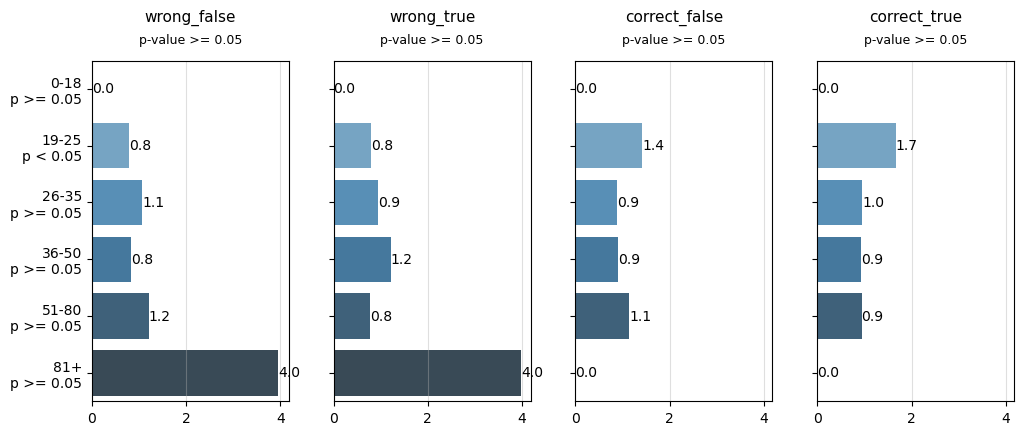

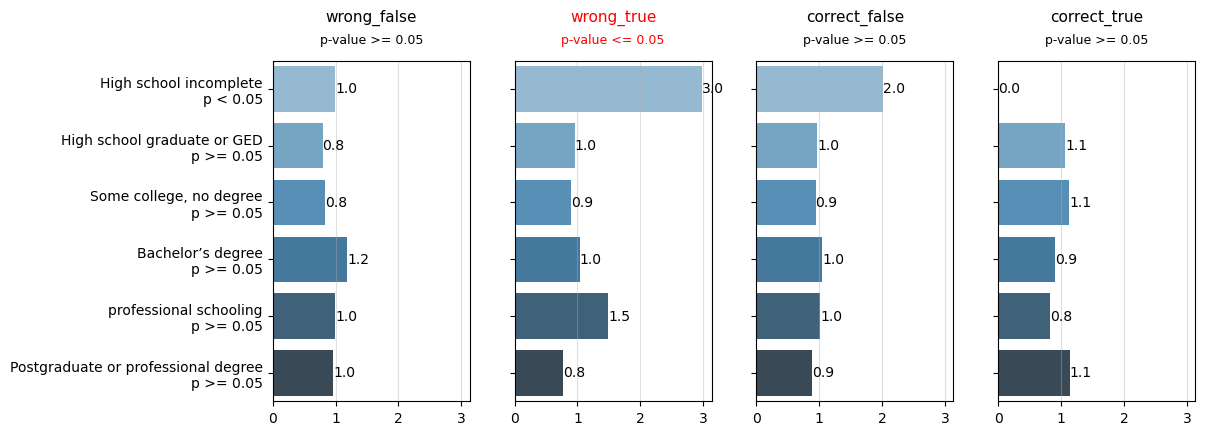

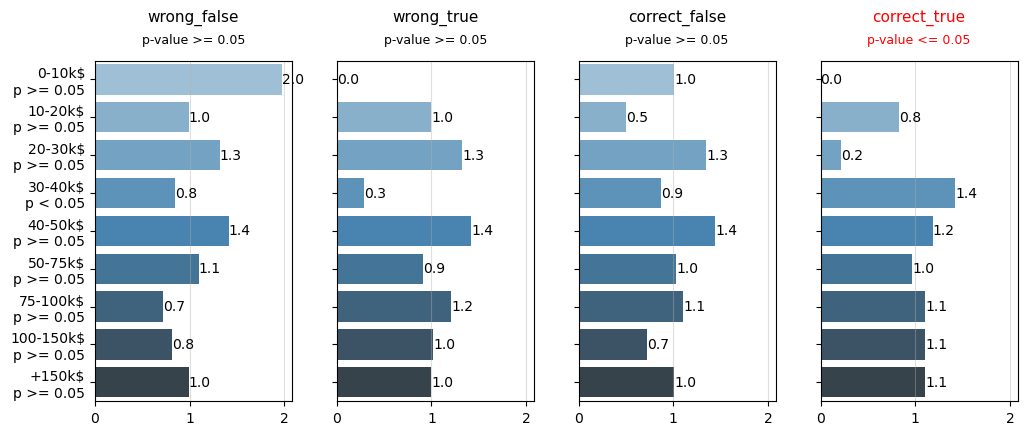

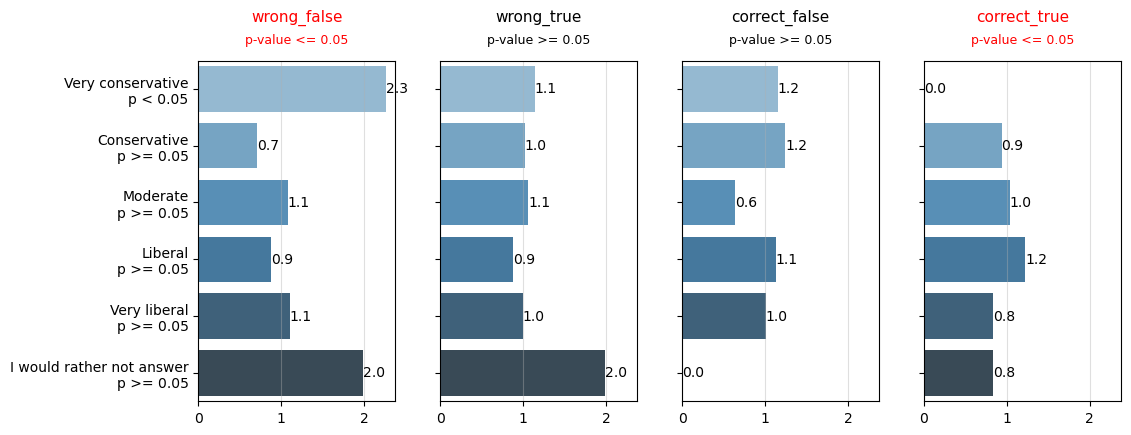

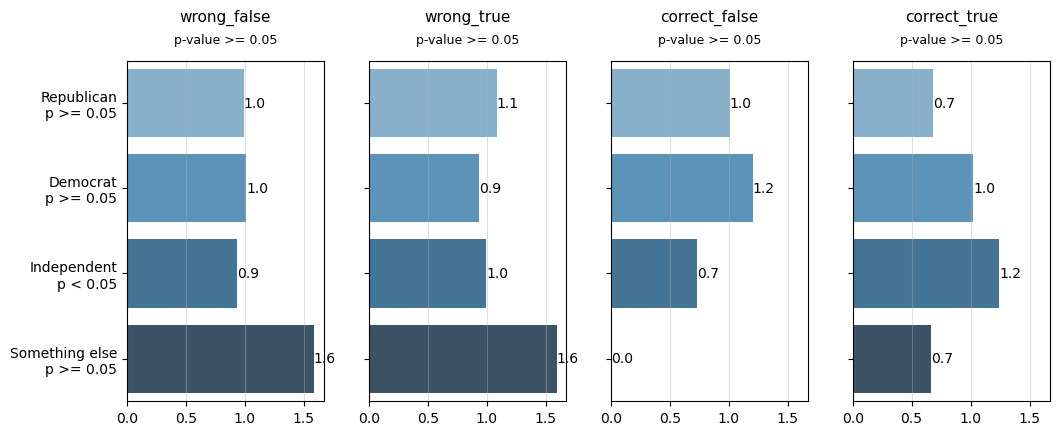

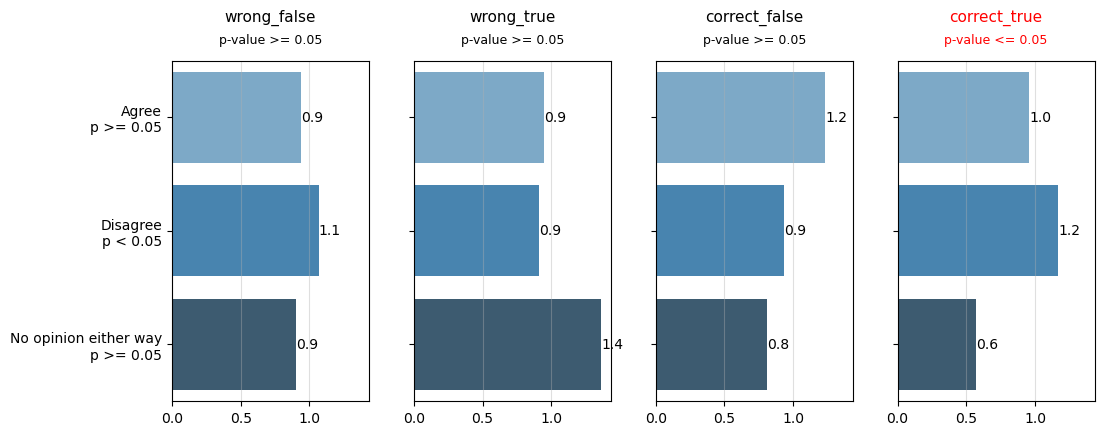

In [62]:
for dimensione in dimensioni_da_analizzare:
    crea_barplot_all_rapporto(raccoglitore_dimensioni,upper_pvalue,inner_pvalue, dimensione,"label",inverted_axes = True)

In [63]:
dimensioni_da_analizzare

['age_ans_index',
 'school_ans_index',
 'taxes_ans_index',
 'political_views_ans_index',
 'consideration_ans_index',
 'southern_border_ans_index']

In [64]:
## analisi bias

L = ['age_ans_label',
    'school_ans_label',
    'taxes_ans_label',
    'political_views_ans_label',
    'consideration_ans_label',
    'southern_border_ans_label']

addnewspace = False

for dimensione in L:
    
    if addnewspace:
        print("\n")
        addnewspace = False
    
    for val1 in df_for_Q1[dimensione].unique():
        for val2 in df_for_Q1[dimensione].unique():
            if val1 != val2:
                
                

                group1 = df_for_Q1[df_for_Q1[dimensione] == val1]["doc_truthfulness_value"]
                group2 = df_for_Q1[df_for_Q1[dimensione] == val2]["doc_truthfulness_value"]
                p = test_mann_whitney_u(group1,group2)
                if p < 0.05:
                    print(dimensione, "|", val1 , "vs",  val2 ,"|" , group1.mean() , "vs", group2.mean() ,"pval:", p)
                    addnewspace = True

age_ans_label | 36-50 vs 26-35 | 2.6194895591647334 vs 2.8983050847457625 pval: 0.02332904163423045
age_ans_label | 36-50 vs 81+ | 2.6194895591647334 vs 4.0 pval: 0.04688513807474404
age_ans_label | 26-35 vs 36-50 | 2.8983050847457625 vs 2.6194895591647334 pval: 0.02332904163423045
age_ans_label | 19-25 vs 81+ | 2.7 vs 4.0 pval: 0.04331765368201786
age_ans_label | 81+ vs 36-50 | 4.0 vs 2.6194895591647334 pval: 0.04688513807474404
age_ans_label | 81+ vs 19-25 | 4.0 vs 2.7 pval: 0.04331765368201786


school_ans_label | Postgraduate or professional degree, including masterâs, doctorate, medical or law degree vs Some college (some community college, associateâs degree) | 2.5609756097560976 vs 2.923954372623574 pval: 0.023806550068143948
school_ans_label | Some college (some community college, associateâs degree) vs Postgraduate or professional degree, including masterâs, doctorate, medical or law degree | 2.923954372623574 vs 2.5609756097560976 pval: 0.023806550068143948


taxes_an

In [65]:
df_for_Q1["age_ans_label"].unique()

array(['51-80', '36-50', '26-35', '19-25', '81+', '0-18'], dtype=object)

In [66]:
df_for_Q1["age_ans_index"] == 1.0

0       False
1       False
2       False
3       False
4       False
        ...  
1194    False
1195    False
1196    False
1197    False
1198    False
Name: age_ans_index, Length: 1193, dtype: bool

In [67]:
df_for_Q1

worker_id  \
0     55b645b1fdf99b1c02906872   
1     55b645b1fdf99b1c02906872   
2     55b645b1fdf99b1c02906872   
3     55b645b1fdf99b1c02906872   
4     55b645b1fdf99b1c02906872   
...                        ...   
1194  6301b7caed960c3930057c7a   
1195  6301b7caed960c3930057c7a   
1196  6301b7caed960c3930057c7a   
1197  6301b7caed960c3930057c7a   
1198  6301b7caed960c3930057c7a   

                                                 doc_id  \
0     joni-ernst-target-describing-11th-hour-obama-r...   
1     gop-challenger-overstates-parole-boards-record...   
2     greene-twists-logic-and-facts-pedophilia-charg...   
3     barnes-partially-right-claim-johnson-has-recei...   
4     david-jolly-says-kathleen-peters-wont-take-sta...   
...                                                 ...   
1194  fact-checking-bernie-sanders-attack-florida-go...   
1195  marjorie-taylor-greene-shared-edited-image-hig...   
1196         some-teachouts-donors-also-gave-super-pacs   
1197  ron-desantis-exaggerates-outstanding-graduate-...   
1198  fact-checking-warnocks-statement-drop-oil-pric...   

     doc_fact_check_ground_truth_label  doc_fact_check_ground_truth_value  \
0                          mostly-true                                4.0   
1                                false                                1.0   
2                        pants-on-fire                                0.0   
3                            half-true                                3.0   
4                          barely-true                                2.0   
...                                ...                                ...   
1194                         half-true                                3.0   
1195                             false                                1.0   
1196                              true                                5.0   
1197                       barely-true                                2.0   
1198                       mostly-true                                4.0   

              sovra       quartile  doc_truthfulness_value  mean  \
0             other          other                     4.0   3.4   
1             other          other                     1.0   1.4   
2     pants-on-fire  correct_false                     1.0   1.2   
3             other          other                     1.0   2.6   
4             other          other                     4.0   2.7   
...             ...            ...                     ...   ...   
1194          other          other                     0.0   2.1   
1195          other          other                     0.0   1.1   
1196           true     wrong_true                     4.0   3.2   
1197          other          other                     5.0   2.6   
1198          other          other                     2.0   3.2   

     age_ans_index age_ans_label  ... k_ai_4_ans_index k_ai_4_ans_label  \
0              4.0         51-80  ...              1.0  definetely_true   
1              4.0         51-80  ...              1.0  definetely_true   
2              4.0         51-80  ...              1.0  definetely_true   
3              4.0         51-80  ...              1.0  definetely_true   
4              4.0         51-80  ...              1.0  definetely_true   
...            ...           ...  ...              ...              ...   
1194           3.0         36-50  ...              1.0  definetely_true   
1195           3.0         36-50  ...              1.0  definetely_true   
1196           3.0         36-50  ...              1.0  definetely_true   
1197           3.0         36-50  ...              1.0  definetely_true   
1198           3.0         36-50  ...              1.0  definetely_true   

     environment_ans_index environment_ans_label s_ai_1_ans_index  \
0                      1.0              Disagree              3.0   
1                      1.0              Disagree              3.0   
2                      1.0              Disagree     

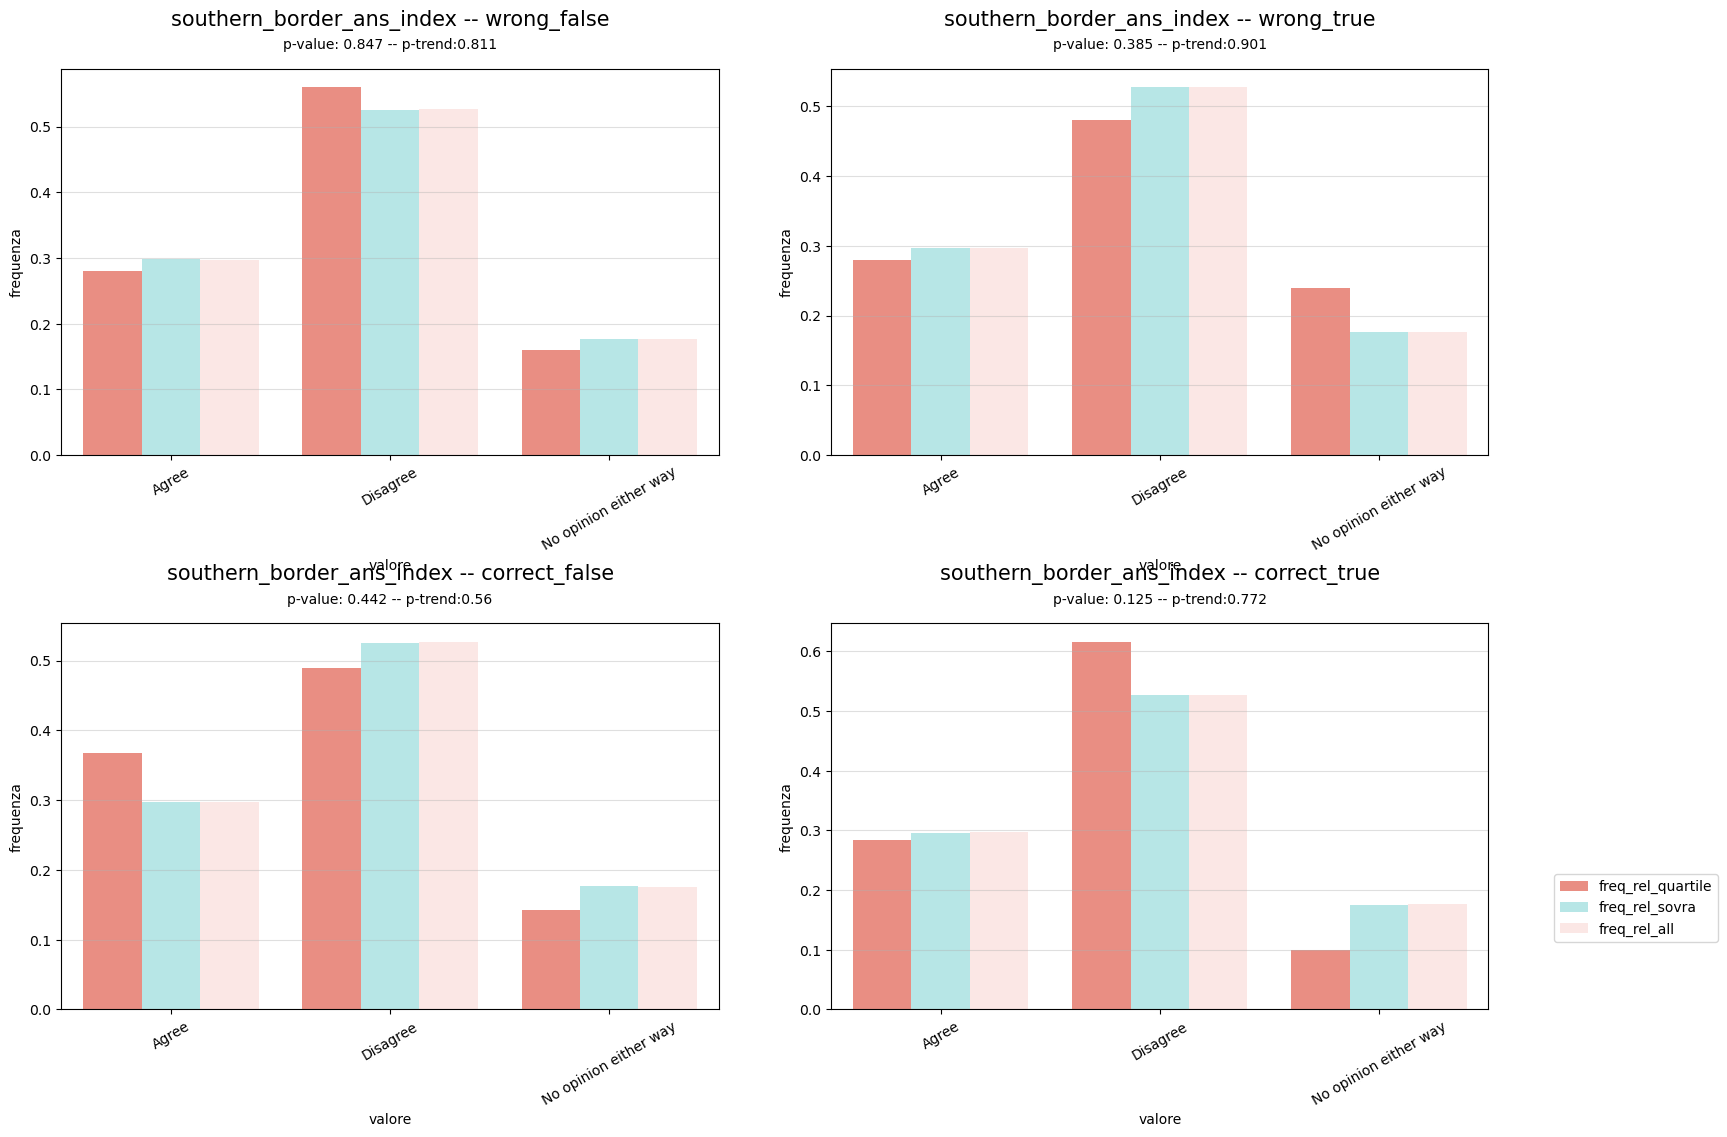

In [68]:
for dimensione in significativi["dimensione"].unique():
    crea_barplot_all(raccoglitore_dimensioni,tabella_p_value, dimensione,"label")

## confronto gruppi

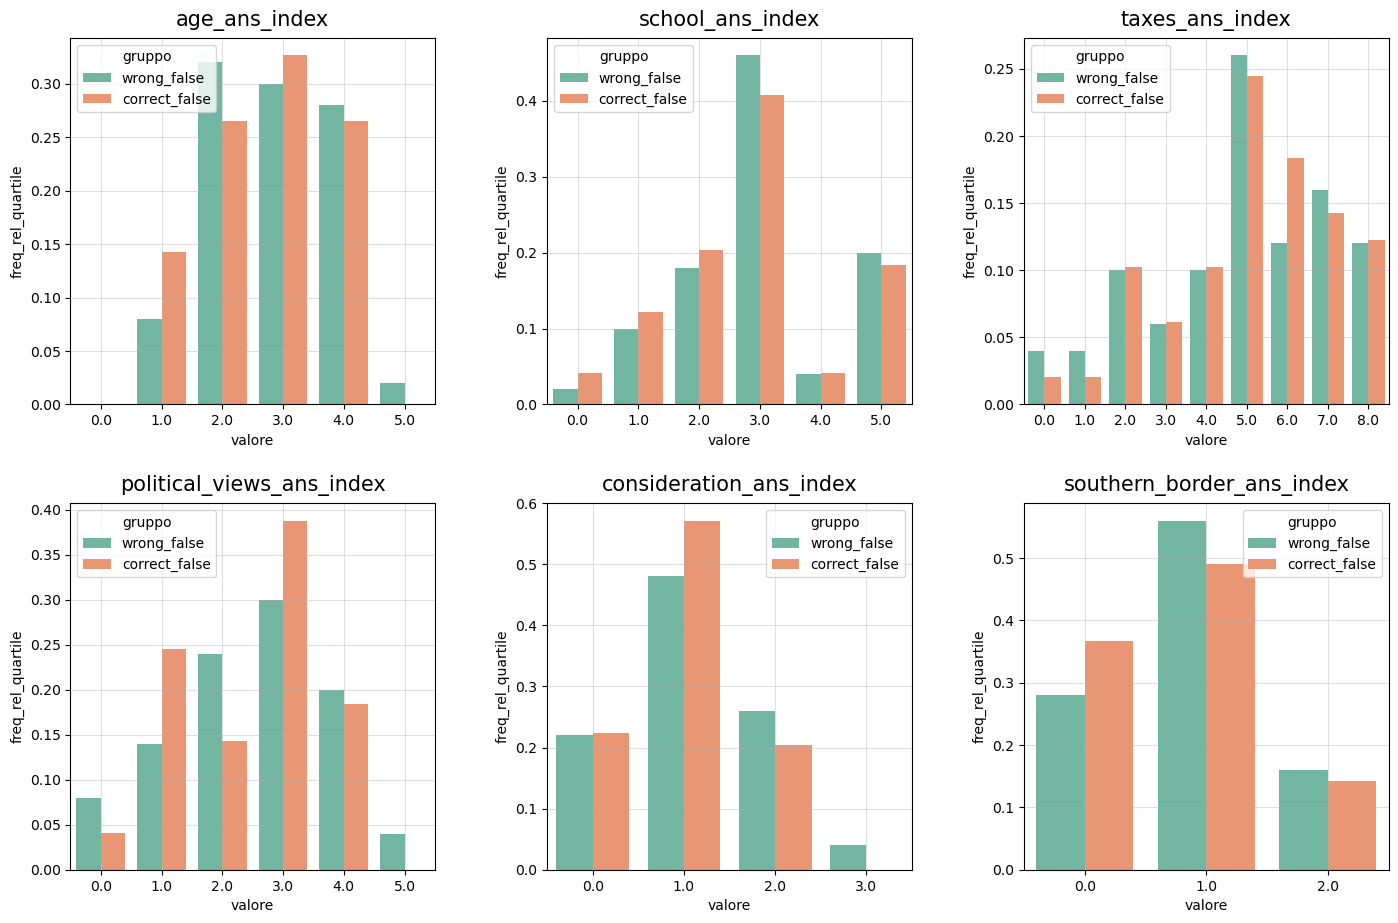

In [69]:
gruppo = ["wrong_false", "correct_false"]
crea_barplot_gruppi_quartili(raccoglitore_dimensioni,dimensioni_da_analizzare,gruppo,label=True)

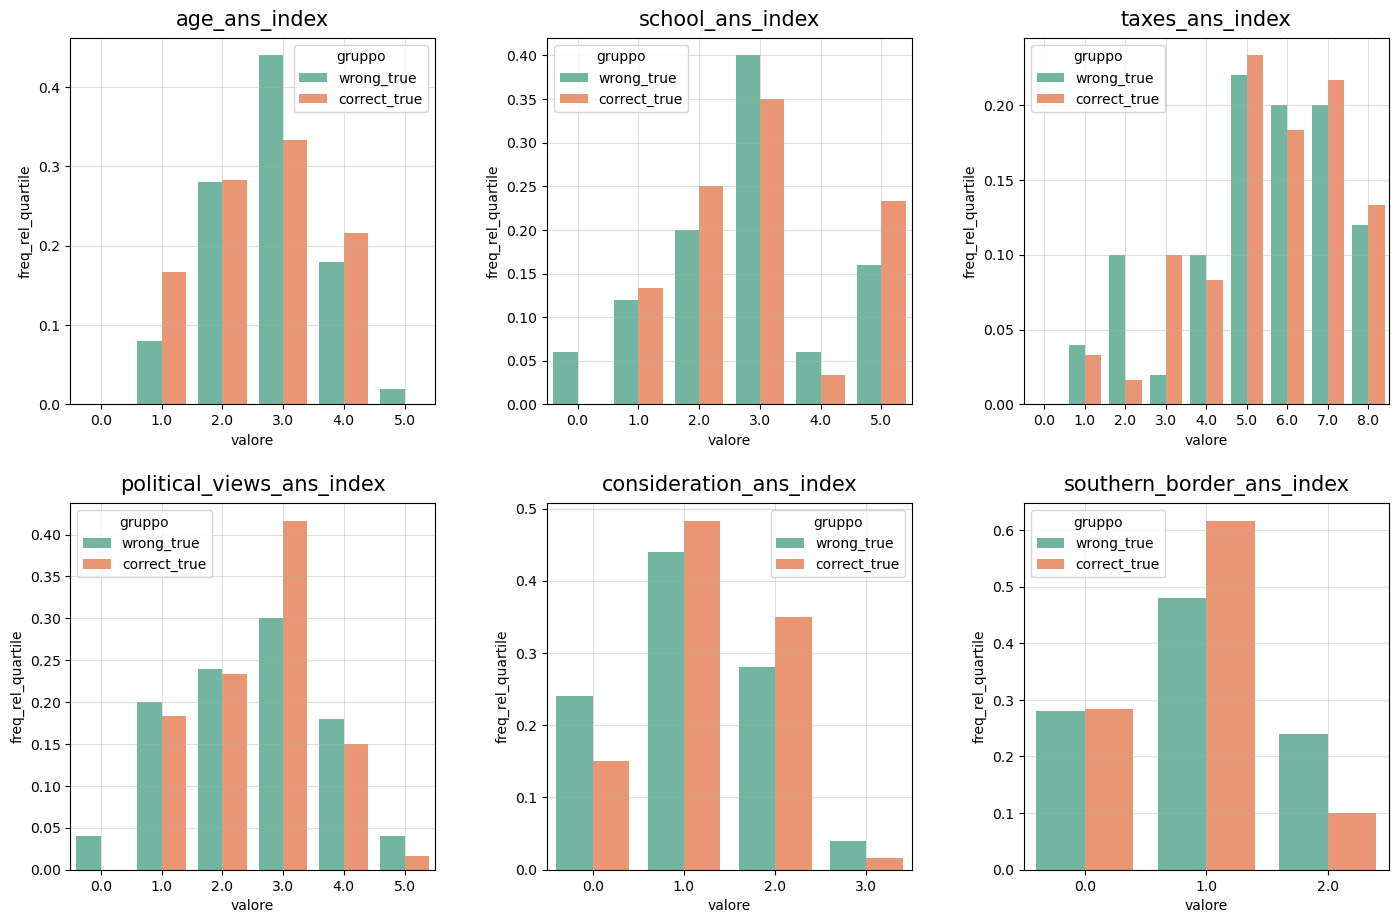

In [70]:
gruppo = ["wrong_true", "correct_true"]
crea_barplot_gruppi_quartili(raccoglitore_dimensioni,dimensioni_da_analizzare,gruppo,label=True)

raggruppo i quartili in gruppi per vedere se c'è una significativa presenza/assenza di valori in questi gruppi:
- gruppo 1 => wrong vs correct


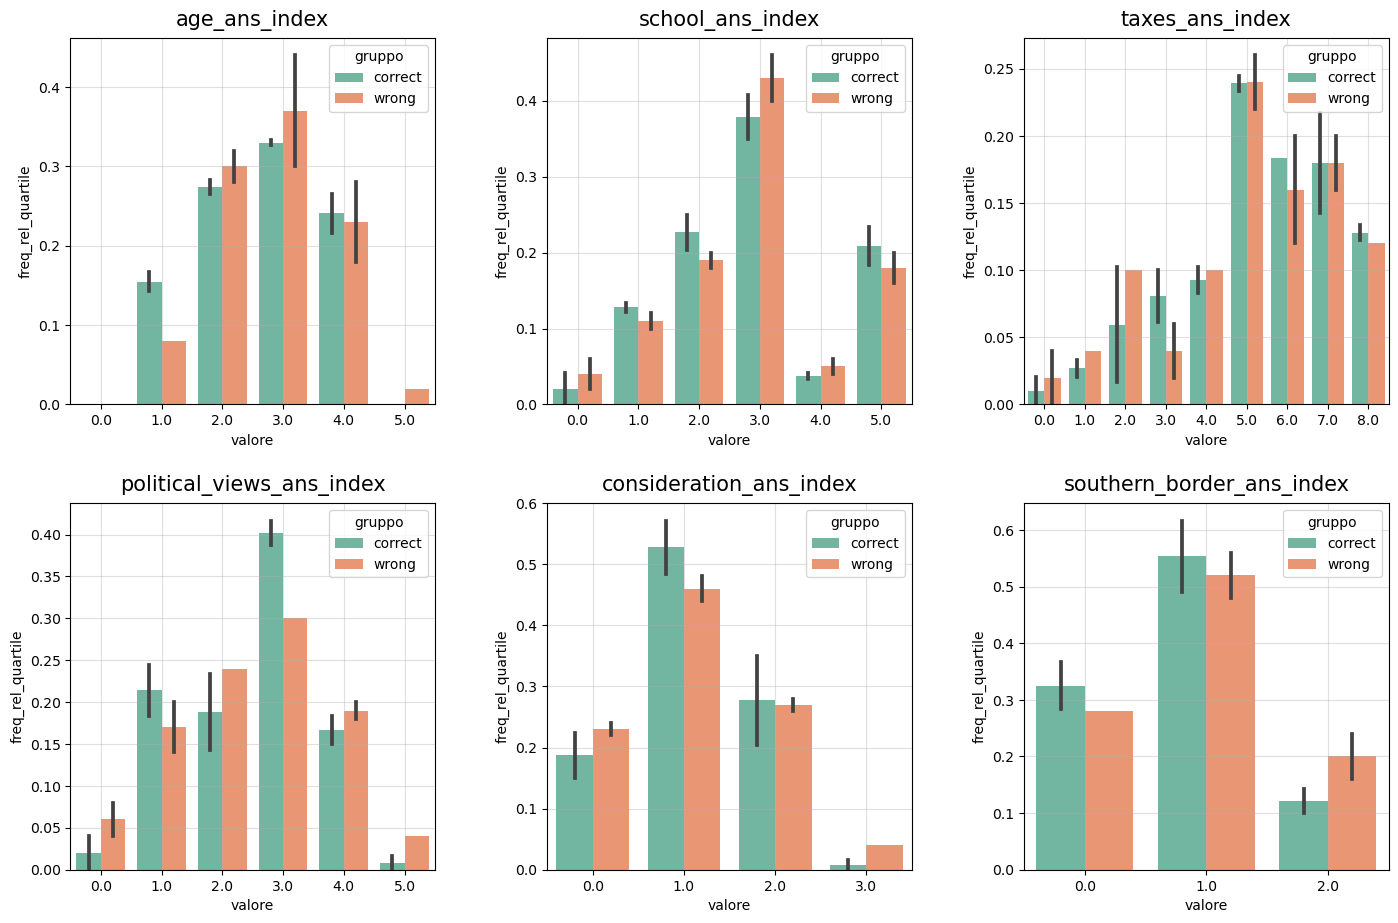

In [71]:
gruppo = [["correct_false", "correct_true"],["wrong_false", "wrong_true"]]
crea_barplot_gruppi_quartili(raccoglitore_dimensioni,dimensioni_da_analizzare,gruppo,label = True,names = ["correct","wrong"])

In [72]:
gruppi_quartili = [["correct_false", "correct_true"],["wrong_false", "wrong_true"]]
name_gruppi = ["correct","wrong"]
calcola_p_value_gruppi_quartili(raccoglitore_dimensioni, dimensioni_da_analizzare, gruppi_quartili,label = True, name_gruppi = name_gruppi, solo_significativi = True)

- gruppo 2 => true vs false

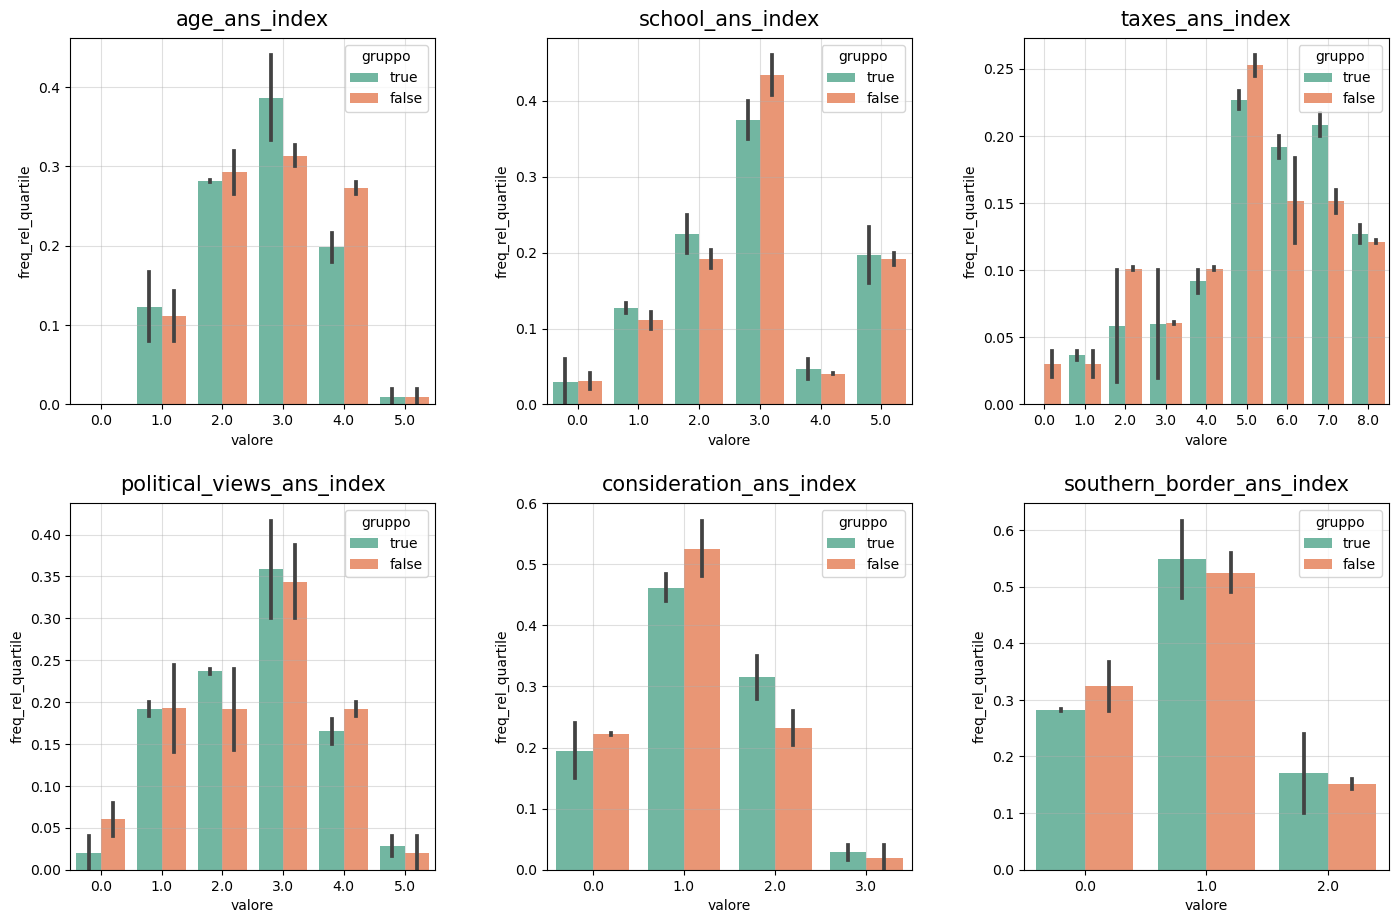

In [73]:
gruppo = [["wrong_true", "correct_true"],["wrong_false", "correct_false"]]
crea_barplot_gruppi_quartili(raccoglitore_dimensioni,dimensioni_da_analizzare,gruppo,label = True,names = ["true","false"])

In [74]:
gruppi_quartili = [["correct_true", "wrong_true"],["wrong_false", "correct_false"]]
name_gruppi = ["true","false"]
calcola_p_value_gruppi_quartili(raccoglitore_dimensioni, dimensioni_da_analizzare, gruppi_quartili,label = True, name_gruppi = name_gruppi, solo_significativi = True)

# Regressione

In [75]:
dimensioni_da_analizzare_per_regressione_1 = ["age_ans_index", "school_ans_index", "taxes_ans_index", "political_views_ans_index", "consideration_ans_index", "southern_border_ans_index"]

\centering
\begin{subfigure}{.85\linewidth}
\centering
\includegraphics[width=\linewidth]{tesi/media/new/regressione_age_ans_index.png}
\caption{Analisi di regressione lineare della dimensione age_ans}
\label{cap:regressione_lineare_age_ans}
\end{subfigure}
\centering
\begin{subfigure}{.85\linewidth}
\centering
\includegraphics[width=\linewidth]{tesi/media/new/regressione_school_ans_index.png}
\caption{Analisi di regressione lineare della dimensione school_ans}
\label{cap:regressione_lineare_school_ans}
\end{subfigure}
\centering
\begin{subfigure}{.85\linewidth}
\centering
\includegraphics[width=\linewidth]{tesi/media/new/regressione_taxes_ans_index.png}
\caption{Analisi di regressione lineare della dimensione taxes_ans}
\label{cap:regressione_lineare_taxes_ans}
\end{subfigure}
\centering
\begin{subfigure}{.85\linewidth}
\centering
\includegraphics[width=\linewidth]{tesi/media/new/regressione_political_views_ans_index.png}
\caption{Analisi di regressione lineare della dimensione politi

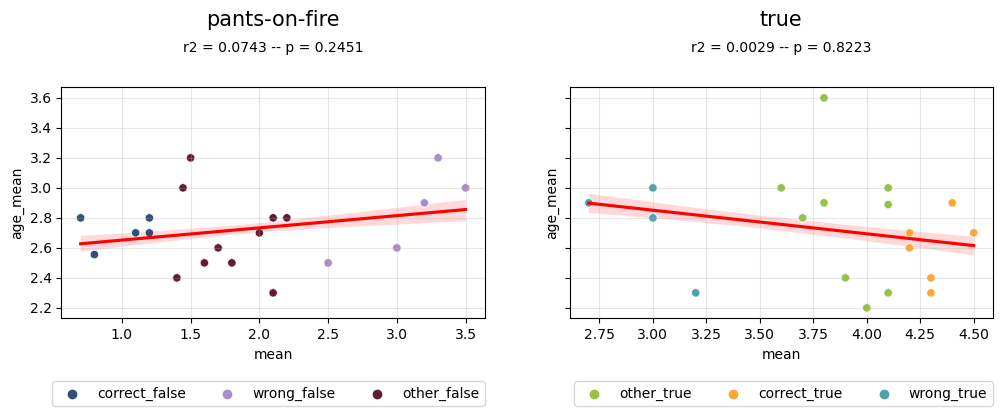

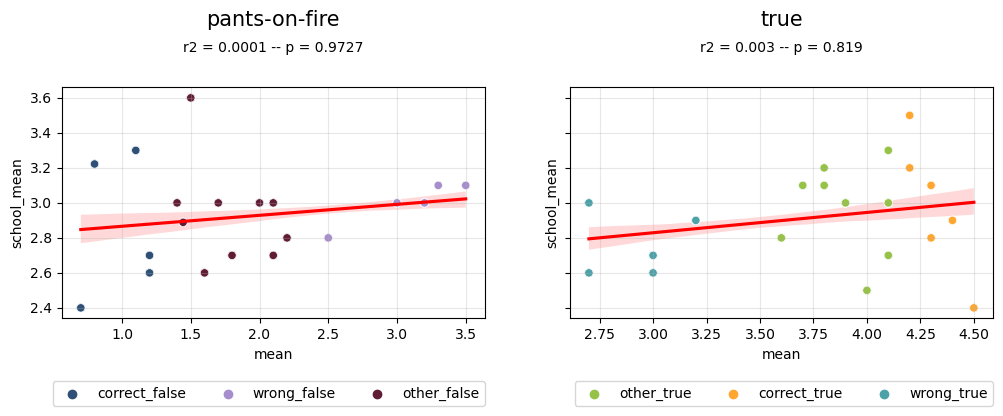

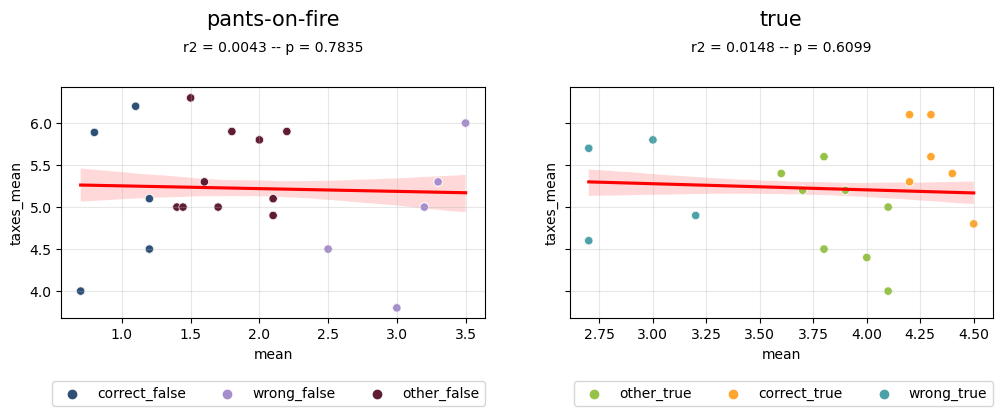

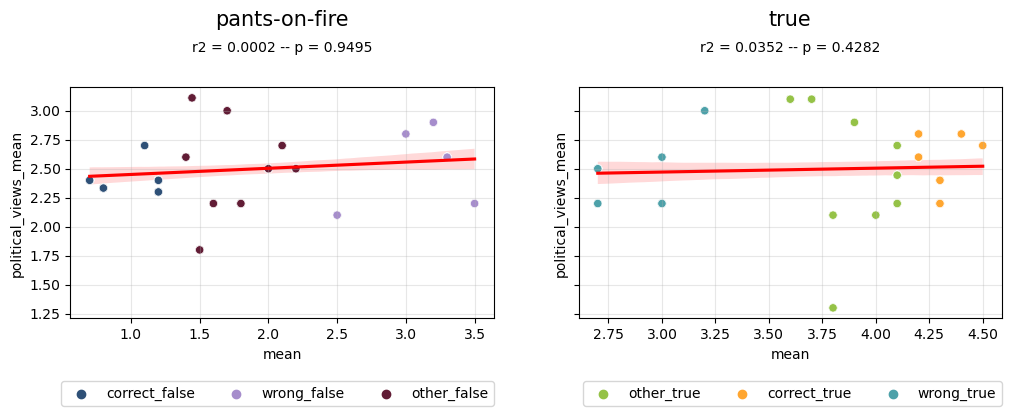

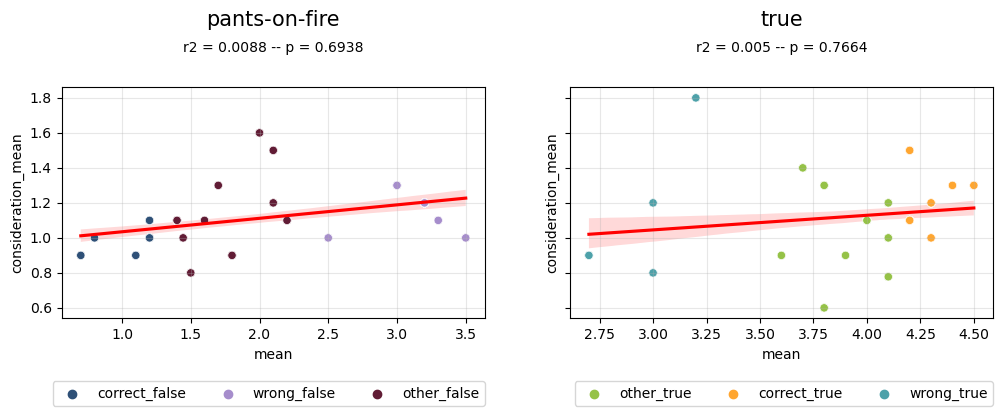

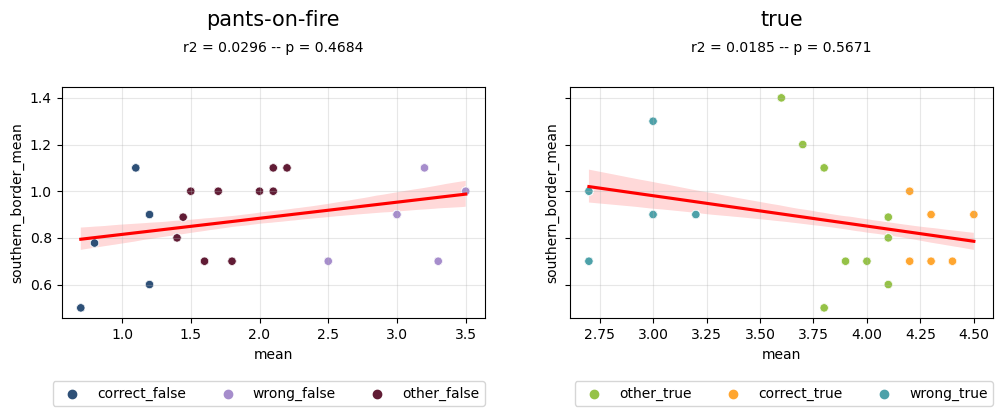

In [76]:
sub = df_for_Q1[df_for_Q1["sovra"] != "other"]

for dimensione in dimensioni_da_analizzare_per_regressione_1:
    sub[dimensione[:-10]+"_mean"] = 0

for statement in sub["doc_id"].unique():
    #sovra = sub[sub["doc_id"] == statement]["sovra"].unique()[0]  
    for dim in dimensioni_da_analizzare_per_regressione_1:
        mean = np.asarray(sub[sub["doc_id"] == statement][dim],dtype = np.float64).mean()
        df_for_Q1.loc[df_for_Q1["doc_id"] == statement, dim[:-10]+"_mean"] = mean 
        
plot_regressione_lineare_RQ(df_for_Q1,dimensioni_da_analizzare_per_regressione_1,10)

## Analisi scarto medio

In [77]:
df_for_Q1 = calcola_scarto(df_for_Q1)

In [78]:
analizza_scarto(df_for_Q1,quartili,dimensioni_da_analizzare)

quartile vs all =>  age_ans_index wrong_true -> 8.513366082512972e-10
quartile vs all =>  taxes_ans_index correct_false -> 8.054364815871583e-06


    ### secondo gruppo di domande

In [79]:
# definisco le dimensioni da analizzare
dimensioni_da_analizzare = ["s_info_1_ans_index",
                            "s_info_3_v2_ans_index",
                            "s_info_4_ans_index",
                            "s_info_5_ans_index",
                            "s_info_6_ans_index",
                            "s_info_7_ans_index",
                            "s_com_1_v2_ans_index",
                            "s_com_2_ans_index"]

## Analisi Bias

In [80]:
df_for_Q1

worker_id  \
0     55b645b1fdf99b1c02906872   
1     55b645b1fdf99b1c02906872   
2     55b645b1fdf99b1c02906872   
3     55b645b1fdf99b1c02906872   
4     55b645b1fdf99b1c02906872   
...                        ...   
1194  6301b7caed960c3930057c7a   
1195  6301b7caed960c3930057c7a   
1196  6301b7caed960c3930057c7a   
1197  6301b7caed960c3930057c7a   
1198  6301b7caed960c3930057c7a   

                                                 doc_id  \
0     joni-ernst-target-describing-11th-hour-obama-r...   
1     gop-challenger-overstates-parole-boards-record...   
2     greene-twists-logic-and-facts-pedophilia-charg...   
3     barnes-partially-right-claim-johnson-has-recei...   
4     david-jolly-says-kathleen-peters-wont-take-sta...   
...                                                 ...   
1194  fact-checking-bernie-sanders-attack-florida-go...   
1195  marjorie-taylor-greene-shared-edited-image-hig...   
1196         some-teachouts-donors-also-gave-super-pacs   
1197  ron-desantis-exaggerates-outstanding-graduate-...   
1198  fact-checking-warnocks-statement-drop-oil-pric...   

     doc_fact_check_ground_truth_label  doc_fact_check_ground_truth_value  \
0                          mostly-true                                4.0   
1                                false                                1.0   
2                        pants-on-fire                                0.0   
3                            half-true                                3.0   
4                          barely-true                                2.0   
...                                ...                                ...   
1194                         half-true                                3.0   
1195                             false                                1.0   
1196                              true                                5.0   
1197                       barely-true                                2.0   
1198                       mostly-true                                4.0   

              sovra       quartile  doc_truthfulness_value  mean  \
0             other          other                     4.0   3.4   
1             other          other                     1.0   1.4   
2     pants-on-fire  correct_false                     1.0   1.2   
3             other          other                     1.0   2.6   
4             other          other                     4.0   2.7   
...             ...            ...                     ...   ...   
1194          other          other                     0.0   2.1   
1195          other          other                     0.0   1.1   
1196           true     wrong_true                     4.0   3.2   
1197          other          other                     5.0   2.6   
1198          other          other                     2.0   3.2   

     age_ans_index age_ans_label  ... s_ai_6_ans_index s_ai_6_ans_label  \
0              4.0         51-80  ...              1.0  slightly_untrue   
1              4.0         51-80  ...              1.0  slightly_untrue   
2              4.0         51-80  ...              1.0  slightly_untrue   
3              4.0         51-80  ...              1.0  slightly_untrue   
4              4.0         51-80  ...              1.0  slightly_untrue   
...            ...           ...  ...              ...              ...   
1194           3.0         36-50  ...              3.0    slightly_true   
1195           3.0         36-50  ...              3.0    slightly_true   
1196           3.0         36-50  ...              3.0    slightly_true   
1197           3.0         36-50  ...              3.0    slightly_true   
1198           3.0         36-50  ...              3.0    slightly_true   

     age_mean school_mean taxes_mean political_views_mean consideration_mean  \
0         NaN         NaN        NaN                  NaN                NaN   
1         NaN         NaN        NaN                  NaN                NaN   
2         2.7       

## Rapporto tra frequenze relative

In [81]:
raccoglitore_dimensioni = crea_raccoglitore_dimensioni(df_for_Q1, dimensioni_da_analizzare, quartili, mapping)

In [82]:
for dimensione in dimensioni_da_analizzare:
    for quartile in quartili:
        raccoglitore_dimensioni[dimensione][quartile]
        r = []
        for row in raccoglitore_dimensioni[dimensione][quartile].iterrows():
            r.append(row[1]["freq_rel_quartile"]/row[1]["freq_rel_sovra"])
        raccoglitore_dimensioni[dimensione][quartile]["rapporto"] = r

In [83]:
tabella_p_value = costruisci_tabella_pvalue(raccoglitore_dimensioni, dimensioni_da_analizzare, quartili)
significativi = filtra_siglificativi(tabella_p_value, dimensioni_da_analizzare, quartili, 0.05,"pvalue_quartile_sovra")
significativi

dimensione       quartile              confronto  valore_pvalue  \
2  s_com_1_v2_ans_index  correct_false  pvalue_quartile_sovra       0.015227   
1    s_info_4_ans_index    wrong_false  pvalue_quartile_sovra       0.016965   

    p_trend  
2  0.691814  
1  0.542059

In [84]:
# for dimensione in dimensioni_da_analizzare:
#     crea_barplot_quartili(raccoglitore_dimensioni, dimensione)

In [85]:
upper_pvalue = {}
for dimensione in dimensioni_da_analizzare:
    upper_pvalue[dimensione] = {}
    for quartile in quartili:
        upper_pvalue[dimensione][quartile] = False

# in alto
add_line = False
for dimensione in dimensioni_da_analizzare:
    for quartile in quartili:
        if add_line:
            print("\n")
            add_line = False

        for A in raccoglitore_dimensioni[dimensione][quartile]["label"]:
            for B in raccoglitore_dimensioni[dimensione][quartile]["label"]:
                if A != B:
                    successes = [raccoglitore_dimensioni[dimensione][quartile][raccoglitore_dimensioni[dimensione][quartile]["label"] == A]["freq_ass_quartile"], 
                                raccoglitore_dimensioni[dimensione][quartile][raccoglitore_dimensioni[dimensione][quartile]["label"] == B]["freq_ass_quartile"]]
                    totals = [raccoglitore_dimensioni[dimensione][quartile][raccoglitore_dimensioni[dimensione][quartile]["label"] == A]["freq_ass_sovra"], 
                            raccoglitore_dimensioni[dimensione][quartile][raccoglitore_dimensioni[dimensione][quartile]["label"] == B]["freq_ass_sovra"]]

                    (chi2, p, arr) = ssp.proportions_chisquare(successes, totals)
                    if p < 0.05:
                        print(dimensione,"|",quartile,"|",A,"vs",B,"|","pvalue:",p)
                        add_line = True
                        upper_pvalue[dimensione][quartile] = True


s_info_1_ans_index | correct_false | slightly_untrue vs not_answer | pvalue: 0.04550026389635857
s_info_1_ans_index | correct_false | not_answer vs slightly_untrue | pvalue: 0.04550026389635857


s_info_3_v2_ans_index | correct_false | not_true_and_not_untrue vs not_answer | pvalue: 0.04550026389635857
s_info_3_v2_ans_index | correct_false | slightly_true vs not_answer | pvalue: 0.049705927461019046
s_info_3_v2_ans_index | correct_false | not_answer vs not_true_and_not_untrue | pvalue: 0.04550026389635857
s_info_3_v2_ans_index | correct_false | not_answer vs slightly_true | pvalue: 0.049705927461019137


s_info_4_ans_index | wrong_false | slightly_untrue vs completely_true | pvalue: 0.0074494175726149215
s_info_4_ans_index | wrong_false | slightly_untrue vs dont_understand | pvalue: 0.021104020555979985
s_info_4_ans_index | wrong_false | slightly_true vs completely_true | pvalue: 0.018651345558456774
s_info_4_ans_index | wrong_false | completely_true vs slightly_untrue | pvalue: 0.0074

In [86]:
inner_pvalue = {}
for dimensione in dimensioni_da_analizzare:
    inner_pvalue[dimensione] = {}
    for val in raccoglitore_dimensioni[dimensione]["wrong_false"]["label"]:
        inner_pvalue[dimensione][val] = False

# vicino a ogni label
add_line = False
for dimensione in dimensioni_da_analizzare:
    for label in raccoglitore_dimensioni[dimensione]["wrong_false"]["label"]:
        if add_line:
            print("\n")
            add_line = False
        for q1 in quartili:
            for q2 in quartili:
                if q1 != q2:
                    successes = [raccoglitore_dimensioni[dimensione][q1][raccoglitore_dimensioni[dimensione][q1]["label"] == label]["freq_ass_quartile"], 
                                raccoglitore_dimensioni[dimensione][q2][raccoglitore_dimensioni[dimensione][q2]["label"] == label]["freq_ass_quartile"]]
                    totals = [raccoglitore_dimensioni[dimensione][q1][raccoglitore_dimensioni[dimensione][q1]["label"] == label]["freq_ass_sovra"], 
                            raccoglitore_dimensioni[dimensione][q2][raccoglitore_dimensioni[dimensione][q2]["label"] == label]["freq_ass_sovra"]]

                    (chi2, p, arr) = ssp.proportions_chisquare(successes, totals)
                    if p < 0.05:
                        print(dimensione,"|", label,"|", q1,"vs",q2,"|","pvalue:",p)
                        add_line = True
                        inner_pvalue[dimensione][label] = True

s_info_1_ans_index | completely_true | wrong_false vs correct_true | pvalue: 0.04174827173791742
s_info_1_ans_index | completely_true | correct_true vs wrong_false | pvalue: 0.04174827173791742


s_info_4_ans_index | slightly_untrue | wrong_false vs correct_false | pvalue: 0.04550026389635857
s_info_4_ans_index | slightly_untrue | wrong_false vs wrong_true | pvalue: 0.04550026389635857
s_info_4_ans_index | slightly_untrue | wrong_false vs correct_true | pvalue: 0.04550026389635857
s_info_4_ans_index | slightly_untrue | correct_false vs wrong_false | pvalue: 0.04550026389635857
s_info_4_ans_index | slightly_untrue | wrong_true vs wrong_false | pvalue: 0.04550026389635857
s_info_4_ans_index | slightly_untrue | correct_true vs wrong_false | pvalue: 0.04550026389635857


s_info_5_ans_index | not_true_and_not_untrue | correct_false vs correct_true | pvalue: 0.01796047752607879
s_info_5_ans_index | not_true_and_not_untrue | wrong_true vs correct_true | pvalue: 0.01796047752607879
s_info_5_an

\centering
\begin{subfigure}{.85\linewidth}
\centering
\includegraphics[width=\linewidth]{tesi/media/new/rapporto_s_info_1_ans_index.png}
\caption{Analisi frequenze relative della dimensione s_info_1_ans}
\label{cap:frequenze_relative_s_info_1_ans}
\end{subfigure}
\centering
\begin{subfigure}{.85\linewidth}
\centering
\includegraphics[width=\linewidth]{tesi/media/new/rapporto_s_info_3_v2_ans_index.png}
\caption{Analisi frequenze relative della dimensione s_info_3_v2_ans}
\label{cap:frequenze_relative_s_info_3_v2_ans}
\end{subfigure}
\centering
\begin{subfigure}{.85\linewidth}
\centering
\includegraphics[width=\linewidth]{tesi/media/new/rapporto_s_info_4_ans_index.png}
\caption{Analisi frequenze relative della dimensione s_info_4_ans}
\label{cap:frequenze_relative_s_info_4_ans}
\end{subfigure}
\centering
\begin{subfigure}{.85\linewidth}
\centering
\includegraphics[width=\linewidth]{tesi/media/new/rapporto_s_info_5_ans_index.png}
\caption{Analisi frequenze relative della dimensione s_inf

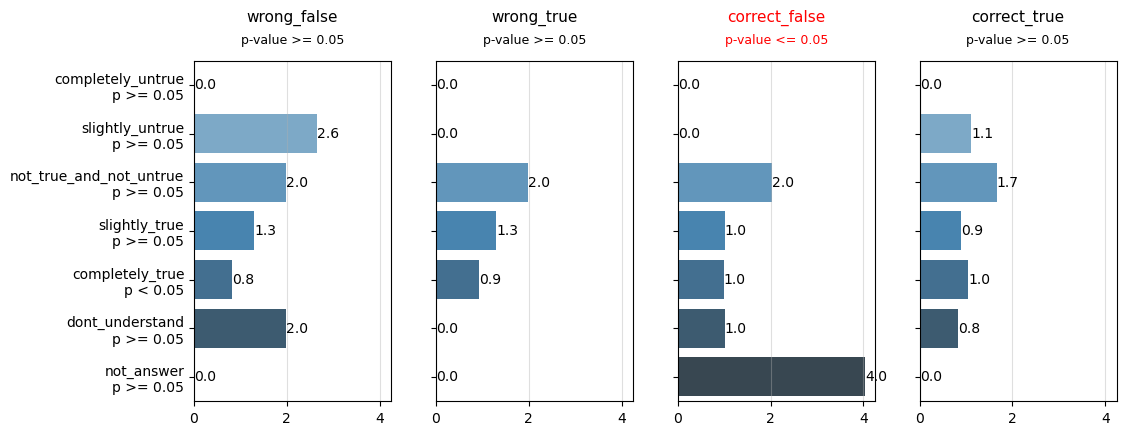

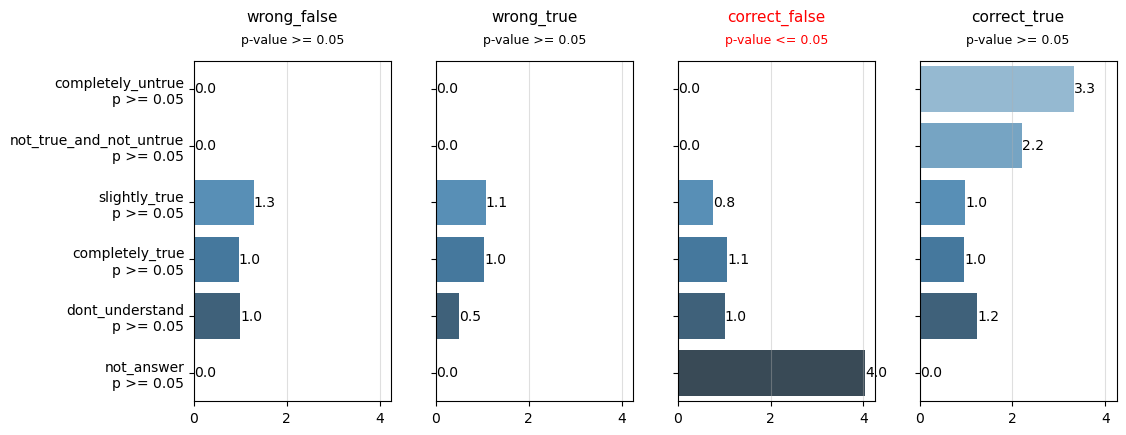

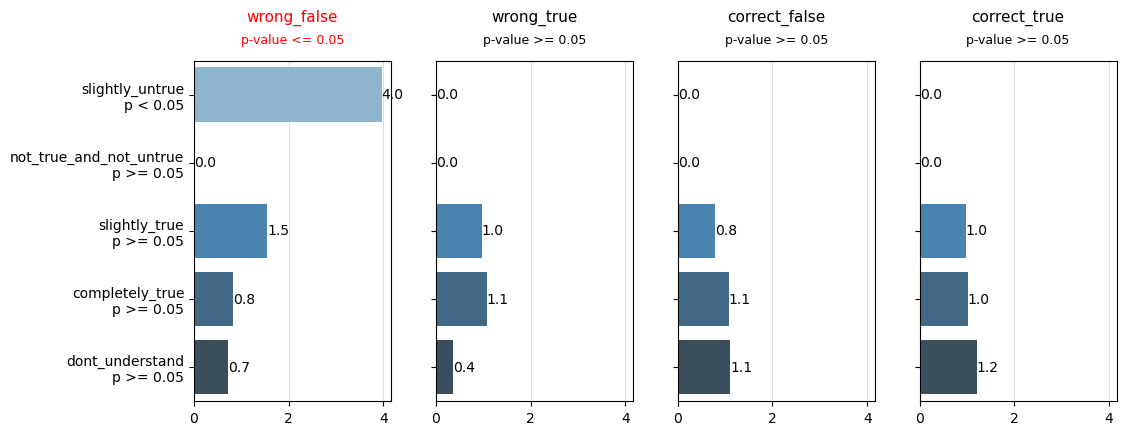

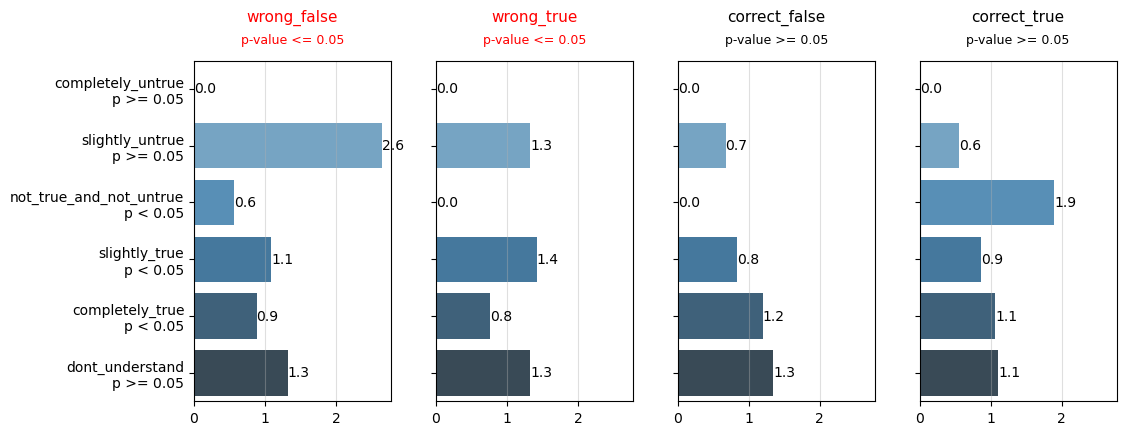

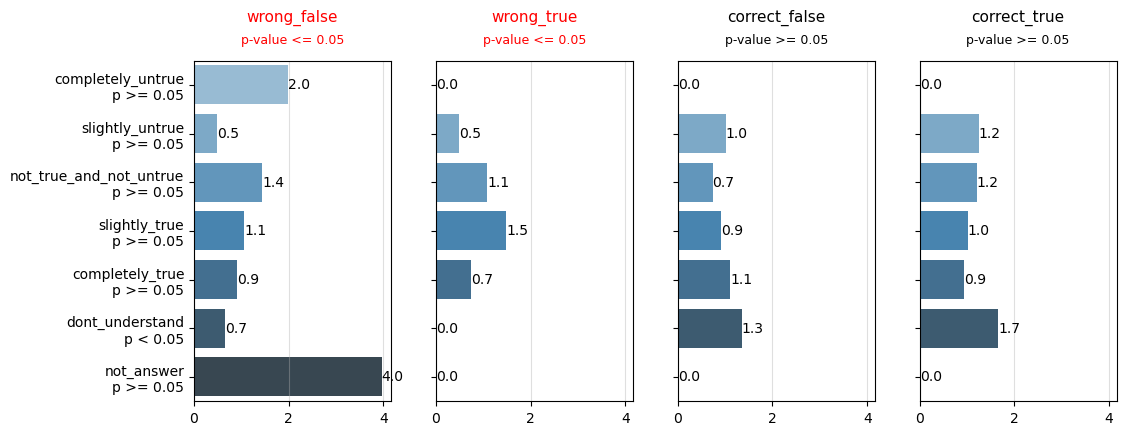

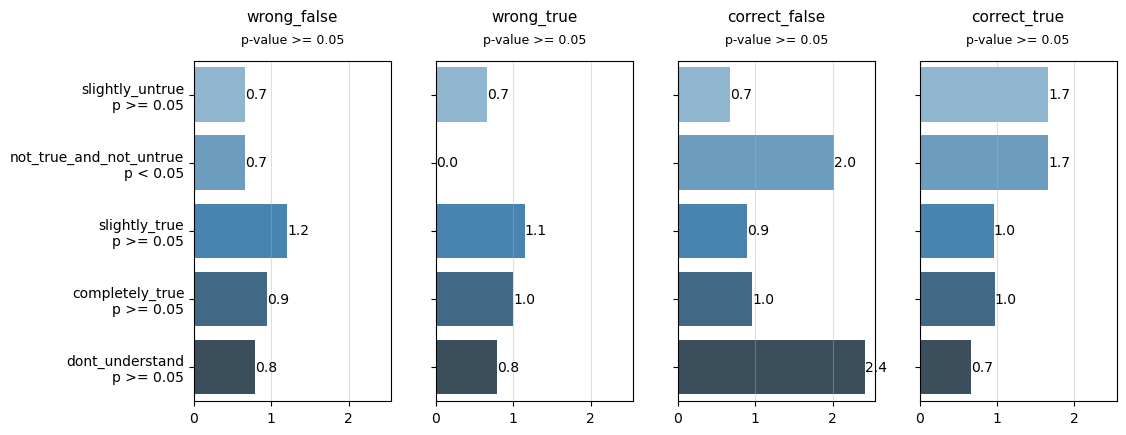

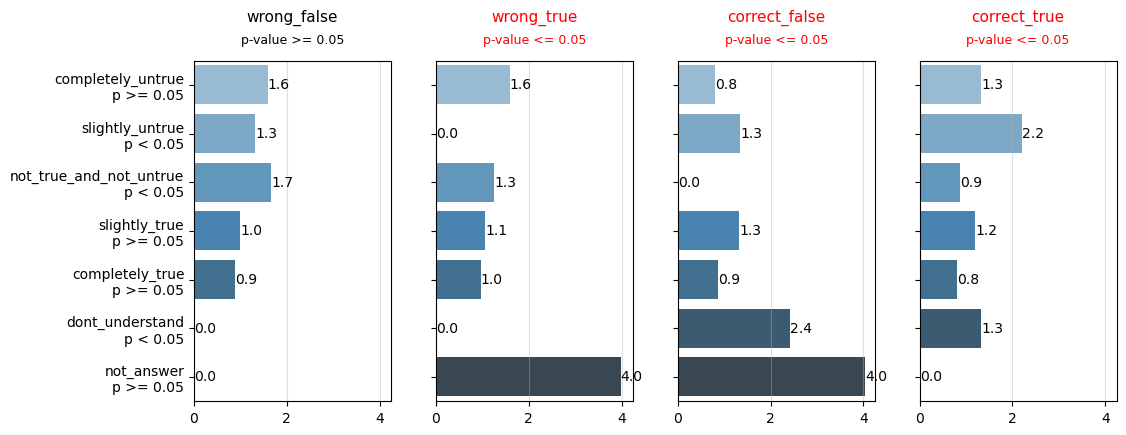

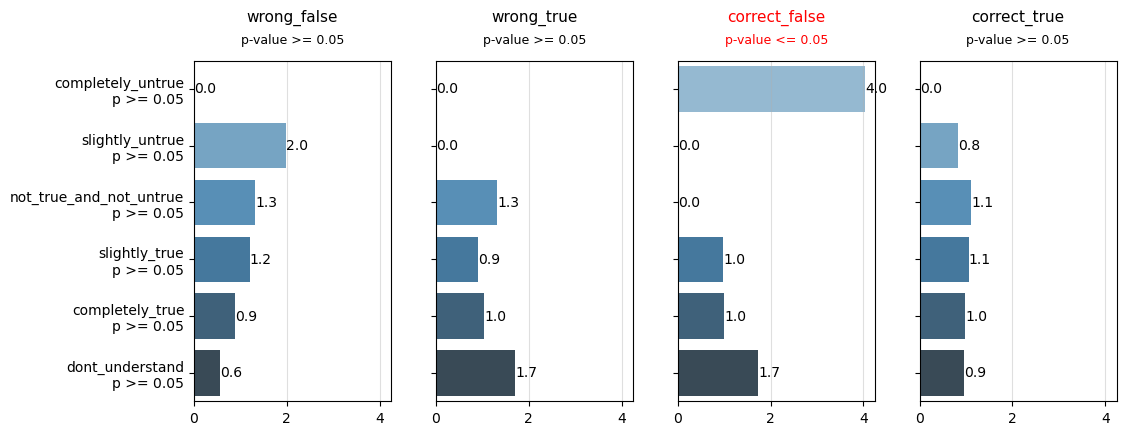

In [87]:
for dimensione in dimensioni_da_analizzare:
    crea_barplot_all_rapporto(raccoglitore_dimensioni,upper_pvalue,inner_pvalue, dimensione,"label",inverted_axes = True)

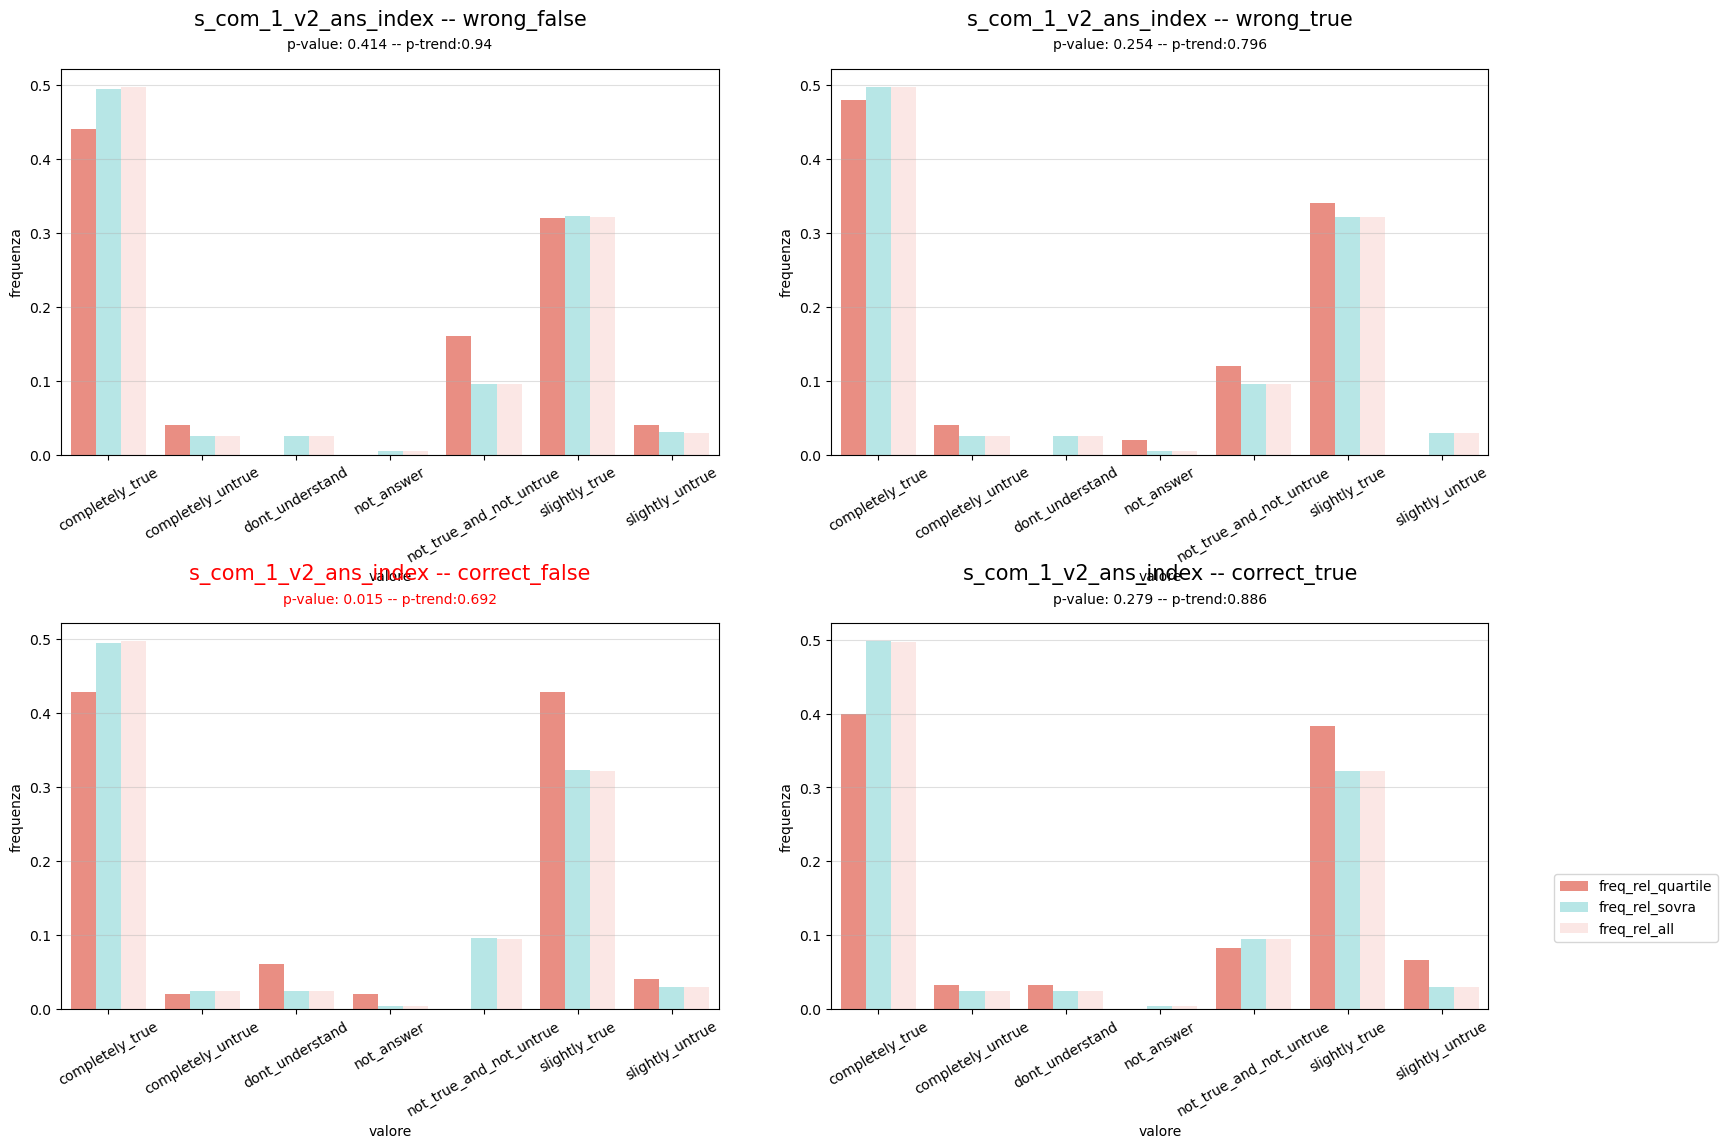

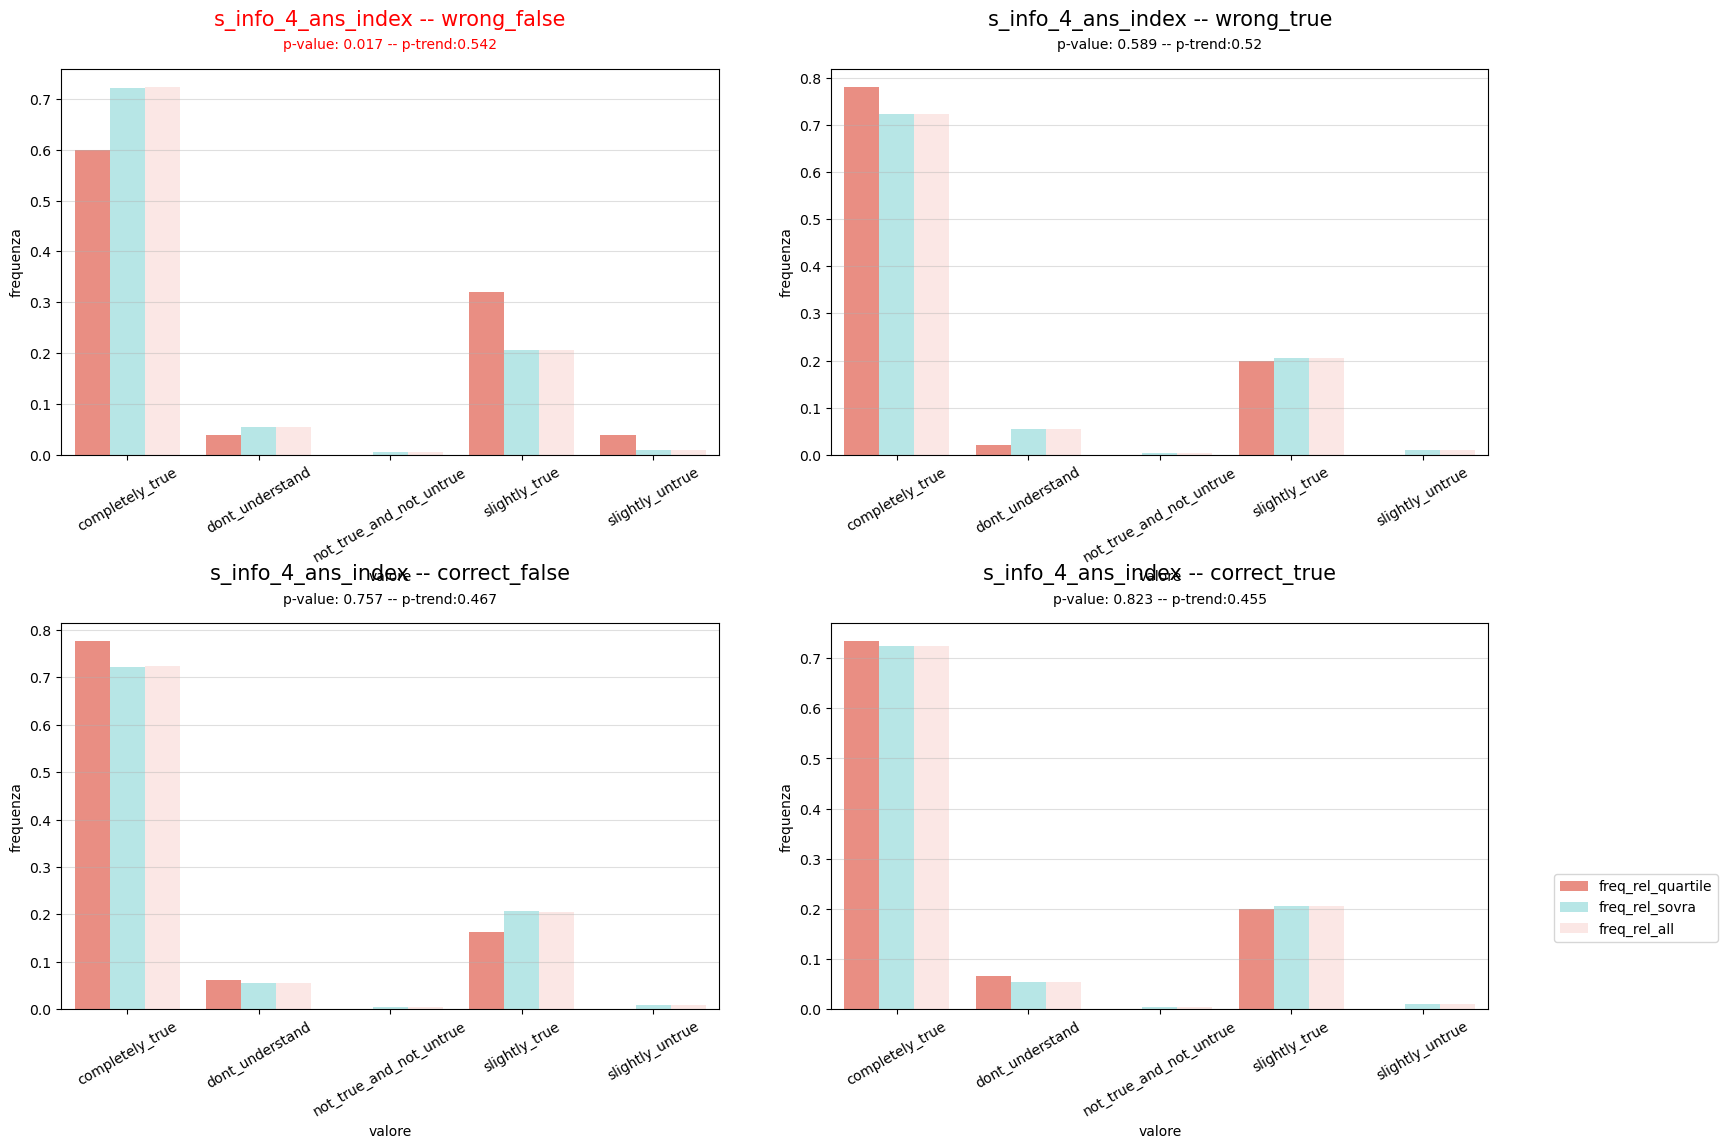

In [88]:
for dimensione in significativi["dimensione"].unique():
    crea_barplot_all(raccoglitore_dimensioni,tabella_p_value, dimensione,"label")

## confronto gruppi

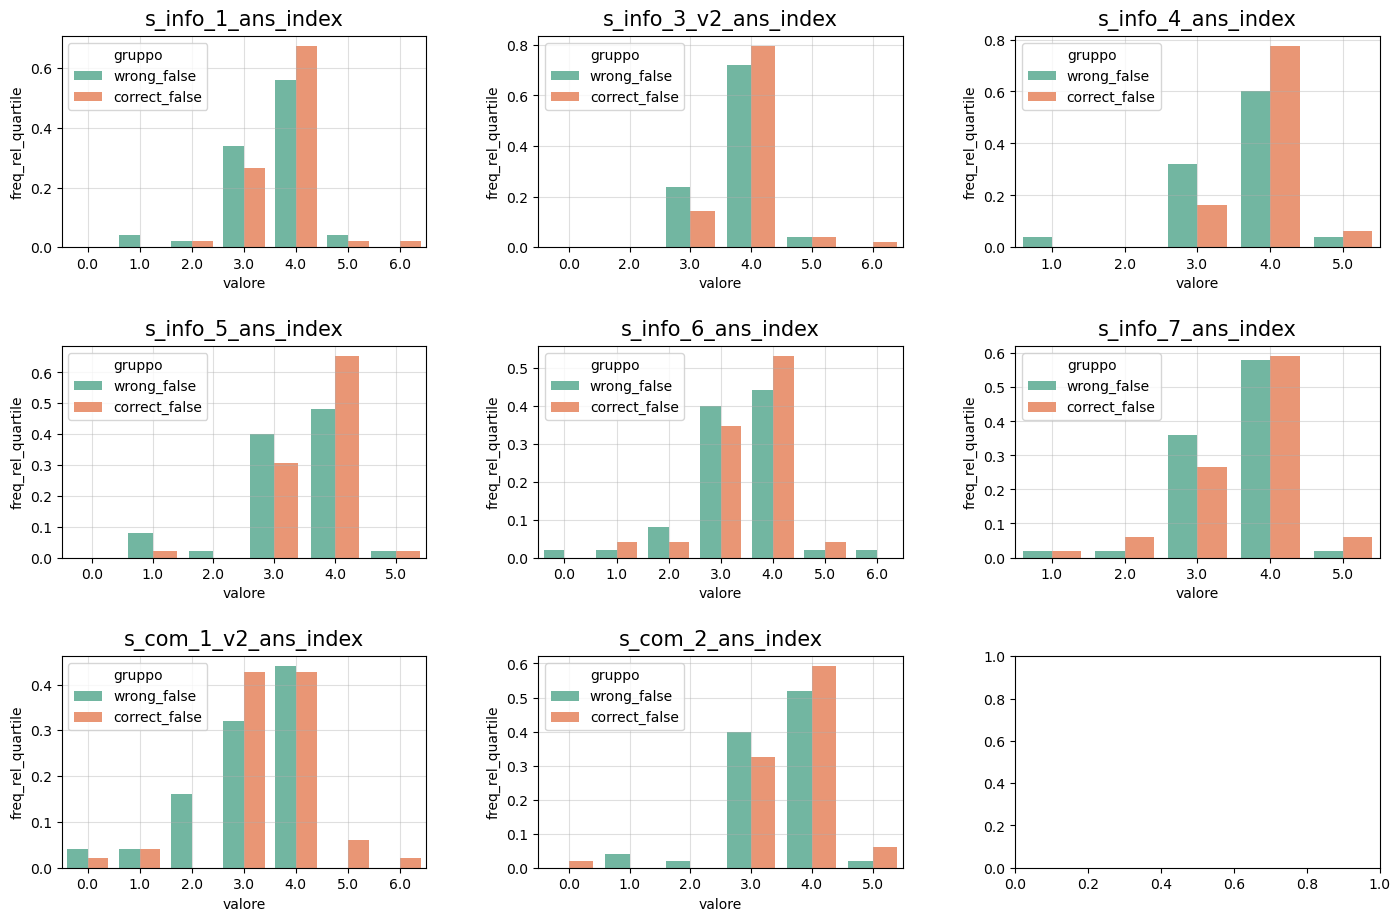

In [89]:
gruppo = ["wrong_false", "correct_false"]
crea_barplot_gruppi_quartili(raccoglitore_dimensioni,dimensioni_da_analizzare,gruppo,label=True)

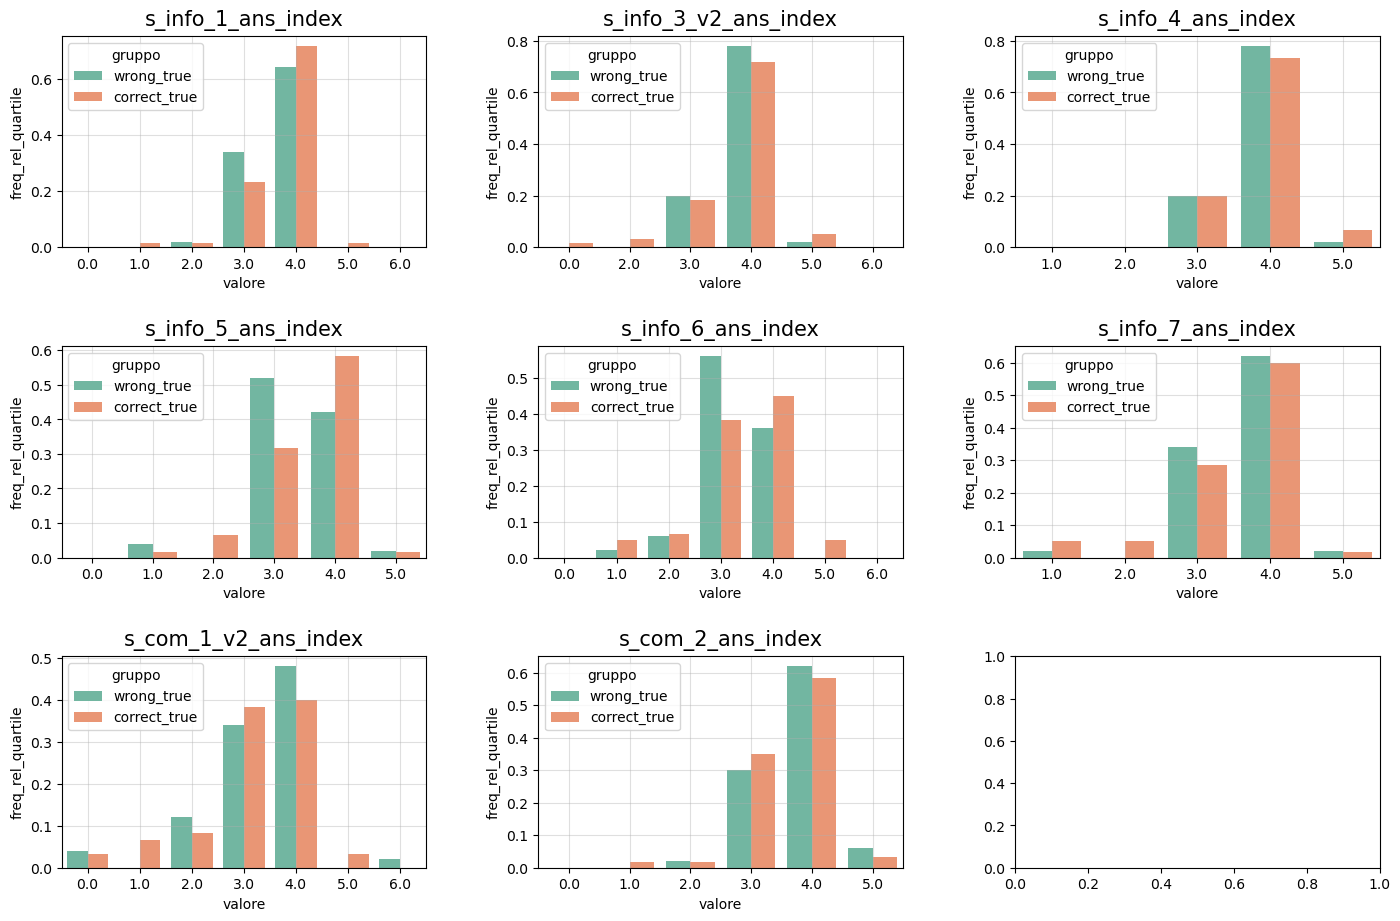

In [90]:
gruppo = ["wrong_true", "correct_true"]
crea_barplot_gruppi_quartili(raccoglitore_dimensioni,dimensioni_da_analizzare,gruppo,label=True)

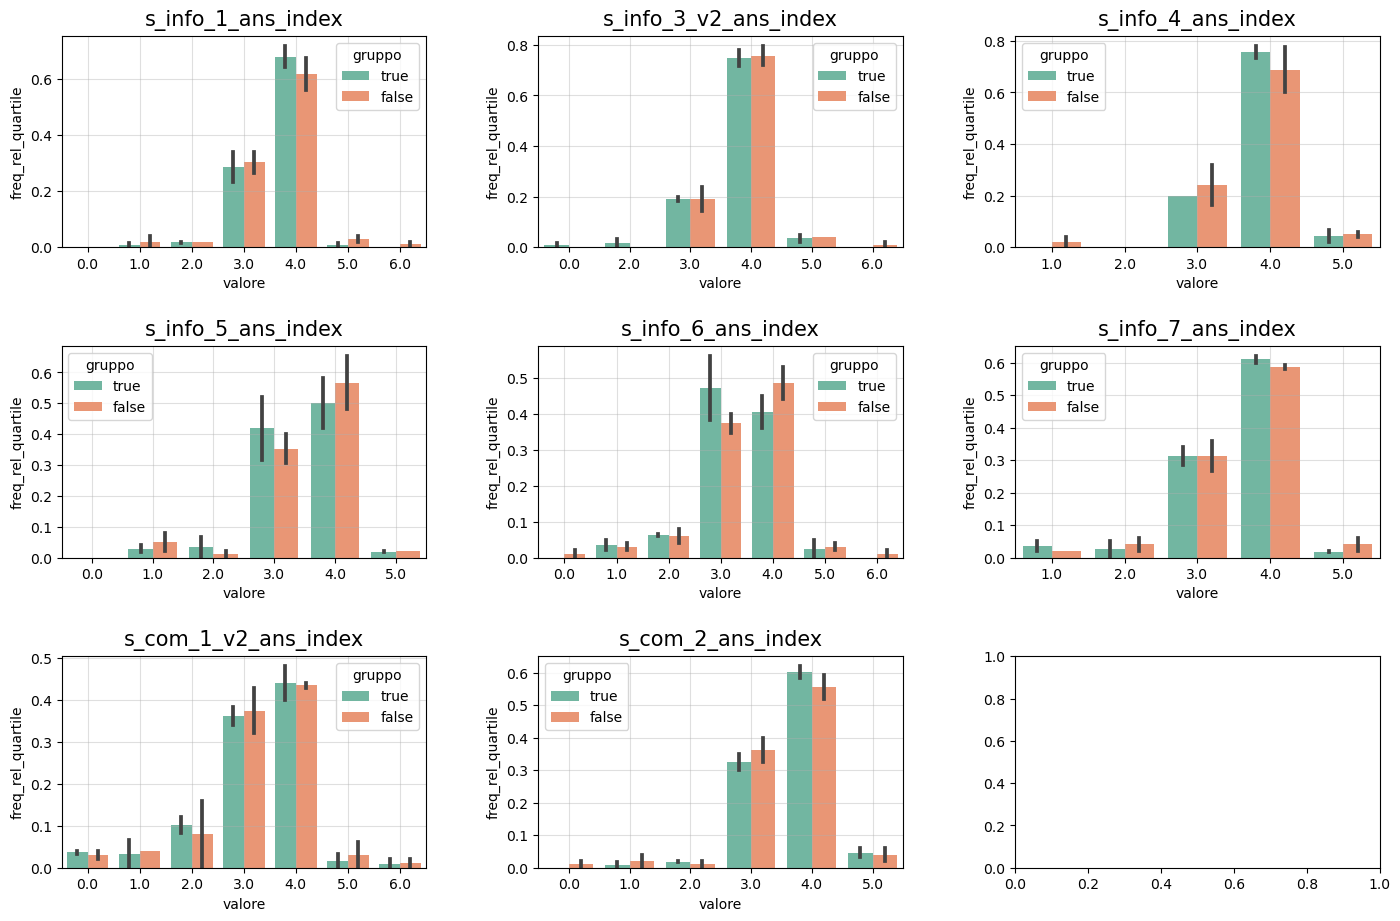

In [91]:
gruppo = [["wrong_true", "correct_true"],["wrong_false", "correct_false"]]
crea_barplot_gruppi_quartili(raccoglitore_dimensioni,dimensioni_da_analizzare,gruppo,label = True,names = ["true","false"])

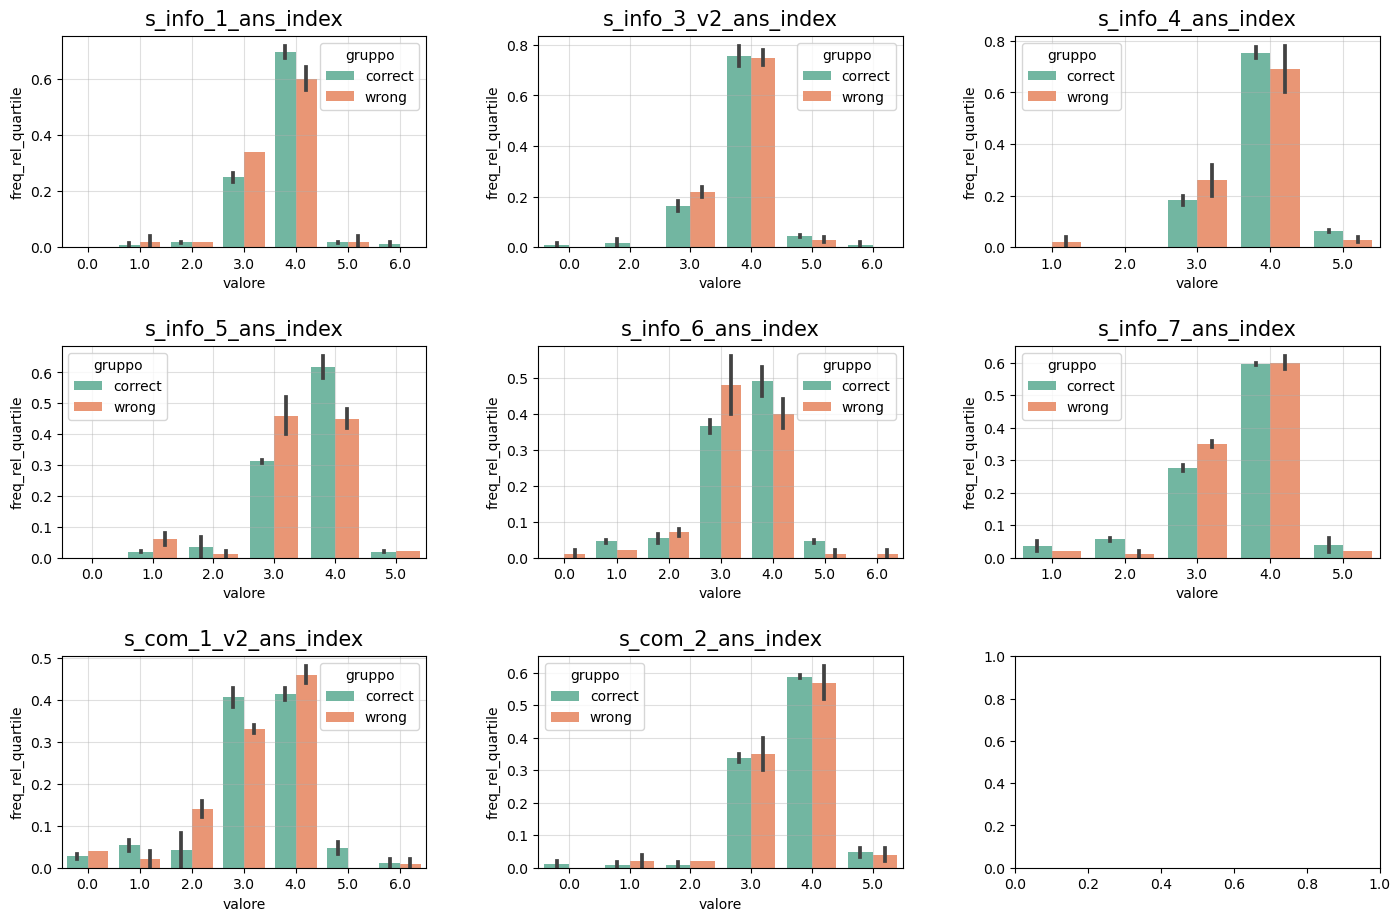

In [92]:
gruppo = [["correct_false", "correct_true"],["wrong_false", "wrong_true"]]
crea_barplot_gruppi_quartili(raccoglitore_dimensioni,dimensioni_da_analizzare,gruppo,label = True,names = ["correct","wrong"])

raggruppo i quartili in gruppi per vedere se c'è una significativa presenza/assenza di valori in questi gruppi:
- gruppo 1 => wrong vs correct


In [93]:
gruppi_quartili = [["correct_false", "correct_true"],["wrong_false", "wrong_true"]]
name_gruppi = ["correct","wrong"]
calcola_p_value_gruppi_quartili(raccoglitore_dimensioni, dimensioni_da_analizzare, gruppi_quartili,label = True, name_gruppi = name_gruppi, solo_significativi = True)

- gruppo 2 => true vs false

In [94]:
gruppi_quartili = [["correct_true", "wrong_true"],["wrong_false", "correct_false"]]
name_gruppi = ["true","false"]
calcola_p_value_gruppi_quartili(raccoglitore_dimensioni, dimensioni_da_analizzare, gruppi_quartili,label = True, name_gruppi = name_gruppi, solo_significativi = True)

### Regressione

In [95]:
dimensioni_da_analizzare_per_regressione_2 = ["s_info_1_ans_index","s_info_3_v2_ans_index","s_info_4_ans_index","s_info_5_ans_index","s_info_6_ans_index",
                                             "s_info_7_ans_index","s_com_1_v2_ans_index","s_com_2_ans_index"]

\centering
\begin{subfigure}{.85\linewidth}
\centering
\includegraphics[width=\linewidth]{tesi/media/new/regressione_s_info_1_ans_index.png}
\caption{Analisi di regressione lineare della dimensione s_info_1_ans}
\label{cap:regressione_lineare_s_info_1_ans}
\end{subfigure}
\centering
\begin{subfigure}{.85\linewidth}
\centering
\includegraphics[width=\linewidth]{tesi/media/new/regressione_s_info_3_v2_ans_index.png}
\caption{Analisi di regressione lineare della dimensione s_info_3_v2_ans}
\label{cap:regressione_lineare_s_info_3_v2_ans}
\end{subfigure}
\centering
\begin{subfigure}{.85\linewidth}
\centering
\includegraphics[width=\linewidth]{tesi/media/new/regressione_s_info_4_ans_index.png}
\caption{Analisi di regressione lineare della dimensione s_info_4_ans}
\label{cap:regressione_lineare_s_info_4_ans}
\end{subfigure}
\centering
\begin{subfigure}{.85\linewidth}
\centering
\includegraphics[width=\linewidth]{tesi/media/new/regressione_s_info_5_ans_index.png}
\caption{Analisi di regressione

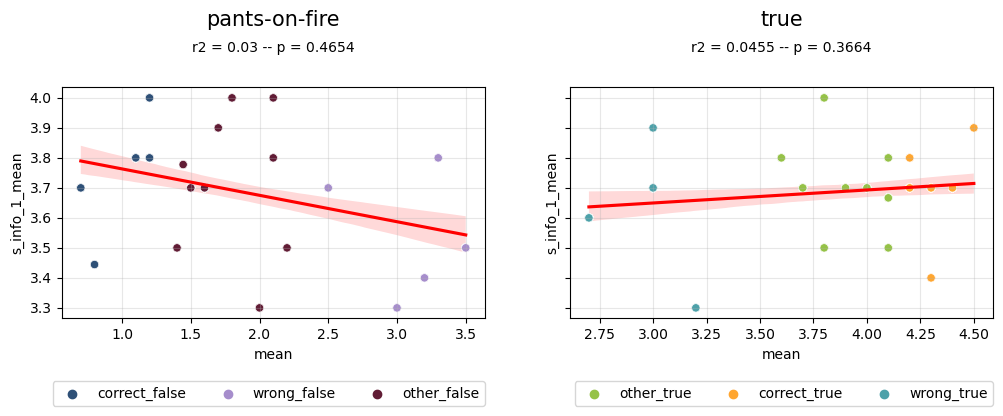

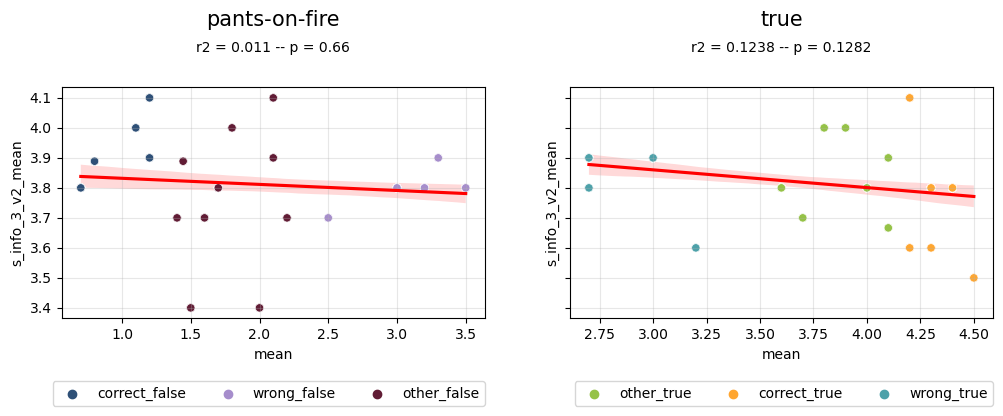

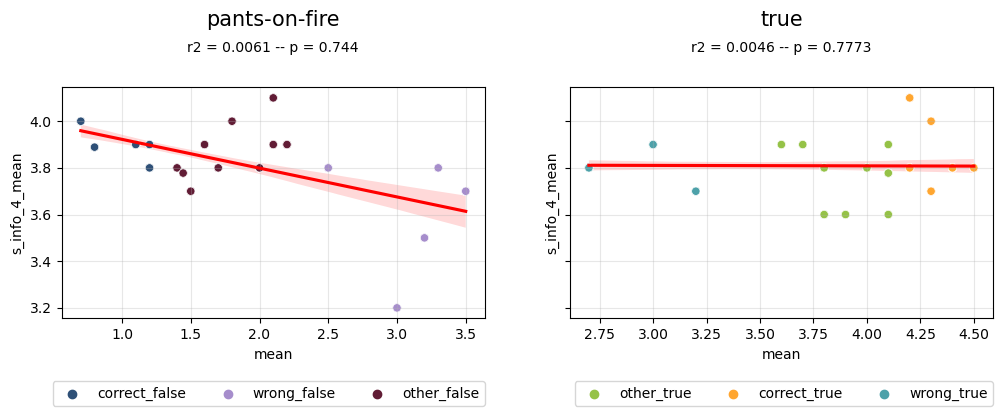

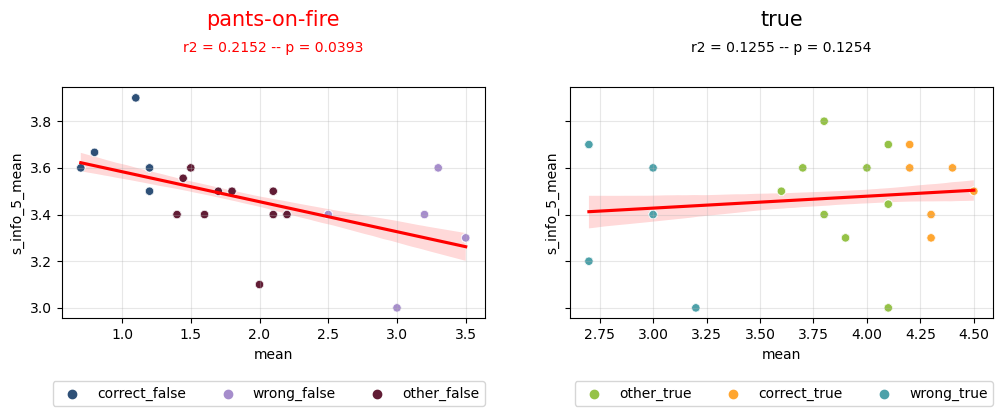

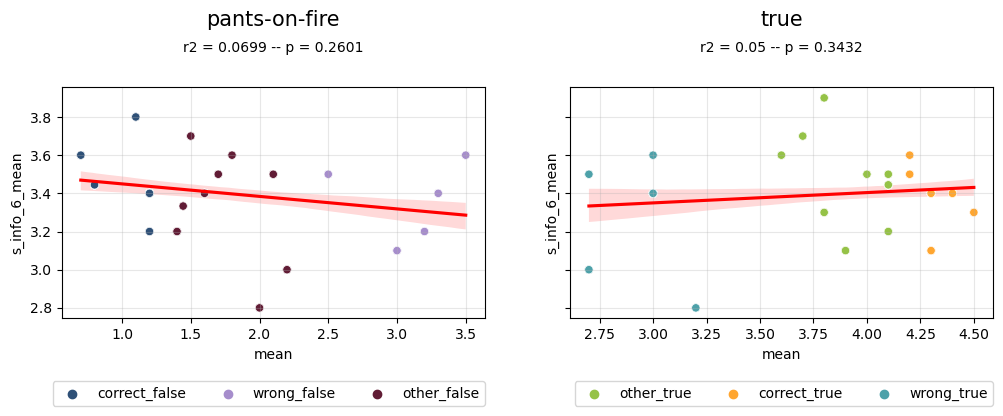

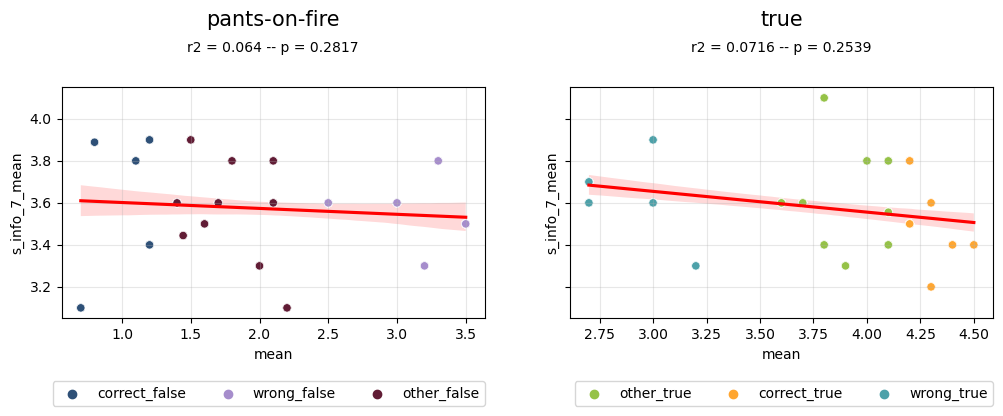

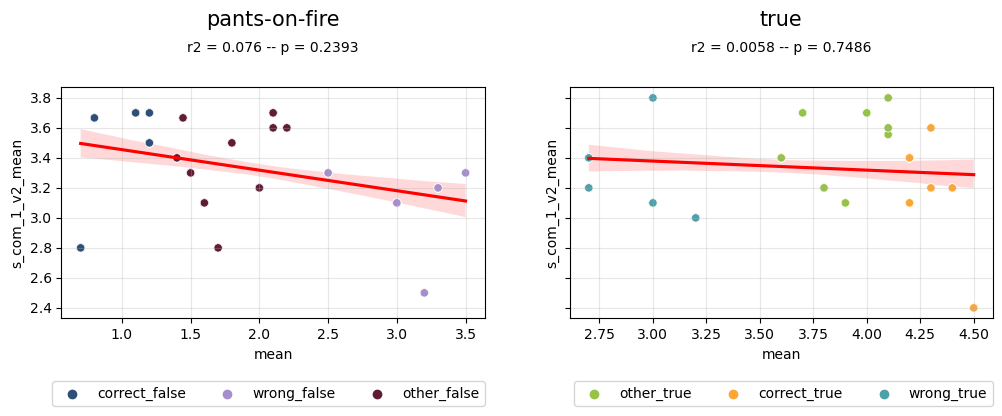

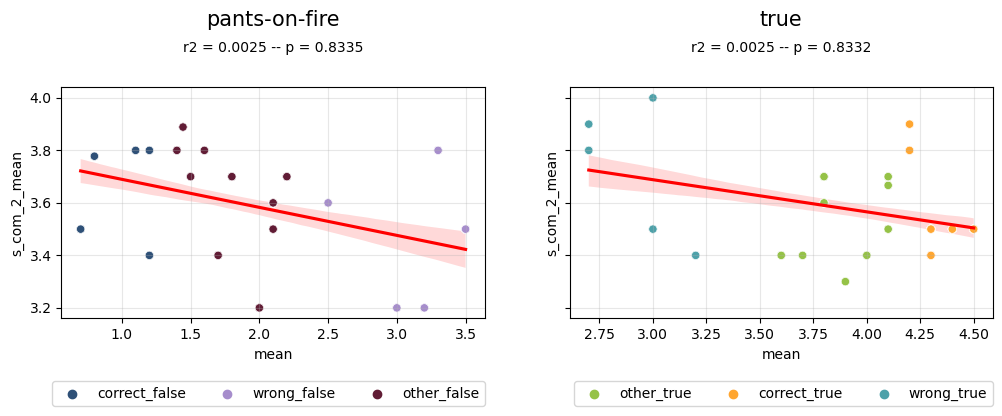

In [96]:
sub = df_for_Q1[df_for_Q1["sovra"] != "other"]

for dimensione in dimensioni_da_analizzare_per_regressione_2:
    sub[dimensione[:-10]+"_mean"] = 0

for statement in sub["doc_id"].unique():
    #sovra = sub[sub["doc_id"] == statement]["sovra"].unique()[0]  
    for dim in dimensioni_da_analizzare_per_regressione_2:
        mean = np.asarray(sub[sub["doc_id"] == statement][dim],dtype = np.float64).mean()
        df_for_Q1.loc[df_for_Q1["doc_id"] == statement, dim[:-10]+"_mean"] = mean 
        
plot_regressione_lineare_RQ(df_for_Q1,dimensioni_da_analizzare_per_regressione_2,10)

## Analisi scarto

In [97]:
analizza_scarto(df_for_Q1,quartili,dimensioni_da_analizzare, solo_quartile_vs_sovra = True)

quartile vs sovra =>  s_info_1_ans_index wrong_false -> 2.2914528679320396e-22
quartile vs sovra =>  s_info_3_v2_ans_index wrong_false -> 3.421611932963891e-05
quartile vs sovra =>  s_info_4_ans_index wrong_false -> 2.492001995013384e-08
quartile vs sovra =>  s_info_5_ans_index wrong_false -> 1.7415972495059122e-07


    ### terzo gruppo di domande

### Frequenze relative

In [98]:
# definisco le dimensioni da analizzare
dimensioni_da_analizzare = ["k_info_1_ans_index",
                            "k_info_2_ans_index",
                            "k_info_3_ans_index",
                            "k_crea_2_ans_index",
                            "k_ai_2_ans_index",
                            "k_ai_4_ans_index"]

In [99]:
raccoglitore_dimensioni = crea_raccoglitore_dimensioni(df_for_Q1, dimensioni_da_analizzare, quartili, mapping)

In [100]:
tabella_p_value = costruisci_tabella_pvalue(raccoglitore_dimensioni, dimensioni_da_analizzare, quartili)
significativi = filtra_siglificativi(tabella_p_value, dimensioni_da_analizzare, quartili, 0.05,"pvalue_quartile_sovra")
significativi

dimensione       quartile              confronto  valore_pvalue  \
3    k_ai_4_ans_index  correct_false  pvalue_quartile_sovra       0.018400   
0  k_info_1_ans_index  correct_false  pvalue_quartile_sovra       0.027682   
1  k_info_1_ans_index   correct_true  pvalue_quartile_sovra       0.030529   

    p_trend  
3  0.722156  
0  0.283316  
1  0.356295

In [101]:
for dimensione in dimensioni_da_analizzare:
    for quartile in quartili:
        raccoglitore_dimensioni[dimensione][quartile]
        r = []
        for row in raccoglitore_dimensioni[dimensione][quartile].iterrows():
            r.append(row[1]["freq_rel_quartile"]/row[1]["freq_rel_sovra"])
        raccoglitore_dimensioni[dimensione][quartile]["rapporto"] = r

In [102]:
#for dimensione in dimensioni_da_analizzare:
#    crea_barplot_quartili(raccoglitore_dimensioni, dimensione)

In [103]:
upper_pvalue = {}
for dimensione in dimensioni_da_analizzare:
    upper_pvalue[dimensione] = {}
    for quartile in quartili:
        upper_pvalue[dimensione][quartile] = False

# in alto
add_line = False
for dimensione in dimensioni_da_analizzare:
    for quartile in quartili:
        if add_line:
            print("\n")
            add_line = False

        for A in raccoglitore_dimensioni[dimensione][quartile]["label"]:
            for B in raccoglitore_dimensioni[dimensione][quartile]["label"]:
                if A != B:
                    successes = [raccoglitore_dimensioni[dimensione][quartile][raccoglitore_dimensioni[dimensione][quartile]["label"] == A]["freq_ass_quartile"], 
                                raccoglitore_dimensioni[dimensione][quartile][raccoglitore_dimensioni[dimensione][quartile]["label"] == B]["freq_ass_quartile"]]
                    totals = [raccoglitore_dimensioni[dimensione][quartile][raccoglitore_dimensioni[dimensione][quartile]["label"] == A]["freq_ass_sovra"], 
                            raccoglitore_dimensioni[dimensione][quartile][raccoglitore_dimensioni[dimensione][quartile]["label"] == B]["freq_ass_sovra"]]

                    (chi2, p, arr) = ssp.proportions_chisquare(successes, totals)
                    if p < 0.05:
                        print(dimensione,"|",quartile,"|",A,"vs",B,"|","pvalue:",p)
                        add_line = True
                        upper_pvalue[dimensione][quartile] = True


k_info_1_ans_index | correct_false | definetely_untrue vs dont_know | pvalue: 0.014041955516407434
k_info_1_ans_index | correct_false | dont_know vs definetely_untrue | pvalue: 0.014041955516407434


k_info_1_ans_index | correct_true | definetely_untrue vs definetely_true | pvalue: 0.008315135260537265
k_info_1_ans_index | correct_true | definetely_true vs definetely_untrue | pvalue: 0.008315135260537265


k_ai_4_ans_index | correct_false | definetely_untrue vs definetely_true | pvalue: 0.011651547793385487
k_ai_4_ans_index | correct_false | definetely_true vs definetely_untrue | pvalue: 0.011651547793385487




In [104]:
inner_pvalue = {}
for dimensione in dimensioni_da_analizzare:
    inner_pvalue[dimensione] = {}
    for val in raccoglitore_dimensioni[dimensione]["wrong_false"]["label"]:
        inner_pvalue[dimensione][val] = False

# vicino a ogni label
add_line = False
for dimensione in dimensioni_da_analizzare:
    for label in raccoglitore_dimensioni[dimensione]["wrong_false"]["label"]:
        if add_line:
            print("\n")
            add_line = False
        for q1 in quartili:
            for q2 in quartili:
                if q1 != q2:
                    successes = [raccoglitore_dimensioni[dimensione][q1][raccoglitore_dimensioni[dimensione][q1]["label"] == label]["freq_ass_quartile"], 
                                raccoglitore_dimensioni[dimensione][q2][raccoglitore_dimensioni[dimensione][q2]["label"] == label]["freq_ass_quartile"]]
                    totals = [raccoglitore_dimensioni[dimensione][q1][raccoglitore_dimensioni[dimensione][q1]["label"] == label]["freq_ass_sovra"], 
                            raccoglitore_dimensioni[dimensione][q2][raccoglitore_dimensioni[dimensione][q2]["label"] == label]["freq_ass_sovra"]]

                    (chi2, p, arr) = ssp.proportions_chisquare(successes, totals)
                    if p < 0.05:
                        print(dimensione,"|", label,"|", q1,"vs",q2,"|","pvalue:",p)
                        add_line = True
                        inner_pvalue[dimensione][label] = True

k_info_1_ans_index | definetely_untrue | correct_false vs correct_true | pvalue: 0.007588035156625178
k_info_1_ans_index | definetely_untrue | wrong_true vs correct_true | pvalue: 0.043028652321059846
k_info_1_ans_index | definetely_untrue | correct_true vs correct_false | pvalue: 0.007588035156625178
k_info_1_ans_index | definetely_untrue | correct_true vs wrong_true | pvalue: 0.043028652321059846


k_info_1_ans_index | definetely_true | correct_false vs correct_true | pvalue: 0.028265769341059194
k_info_1_ans_index | definetely_true | correct_true vs correct_false | pvalue: 0.028265769341059194


k_info_2_ans_index | definetely_untrue | correct_false vs correct_true | pvalue: 0.032516413249075185
k_info_2_ans_index | definetely_untrue | correct_true vs correct_false | pvalue: 0.032516413249075185


k_ai_2_ans_index | definetely_untrue | correct_false vs correct_true | pvalue: 0.049948344814855876
k_ai_2_ans_index | definetely_untrue | correct_true vs correct_false | pvalue: 0.0499483

\centering
\begin{subfigure}{.85\linewidth}
\centering
\includegraphics[width=\linewidth]{tesi/media/new/rapporto_k_info_1_ans_index.png}
\caption{Analisi frequenze relative della dimensione k_info_1_ans}
\label{cap:frequenze_relative_k_info_1_ans}
\end{subfigure}
\centering
\begin{subfigure}{.85\linewidth}
\centering
\includegraphics[width=\linewidth]{tesi/media/new/rapporto_k_info_2_ans_index.png}
\caption{Analisi frequenze relative della dimensione k_info_2_ans}
\label{cap:frequenze_relative_k_info_2_ans}
\end{subfigure}
\centering
\begin{subfigure}{.85\linewidth}
\centering
\includegraphics[width=\linewidth]{tesi/media/new/rapporto_k_info_3_ans_index.png}
\caption{Analisi frequenze relative della dimensione k_info_3_ans}
\label{cap:frequenze_relative_k_info_3_ans}
\end{subfigure}
\centering
\begin{subfigure}{.85\linewidth}
\centering
\includegraphics[width=\linewidth]{tesi/media/new/rapporto_k_crea_2_ans_index.png}
\caption{Analisi frequenze relative della dimensione k_crea_2_ans}


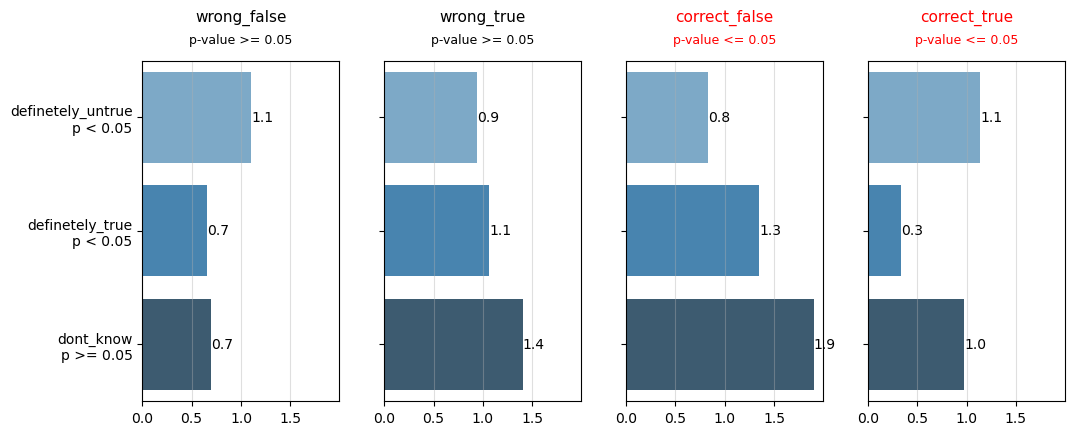

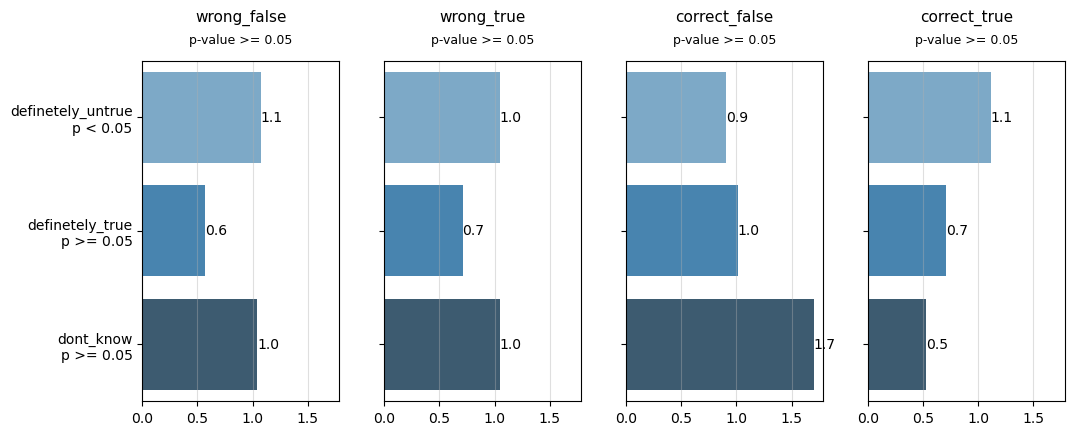

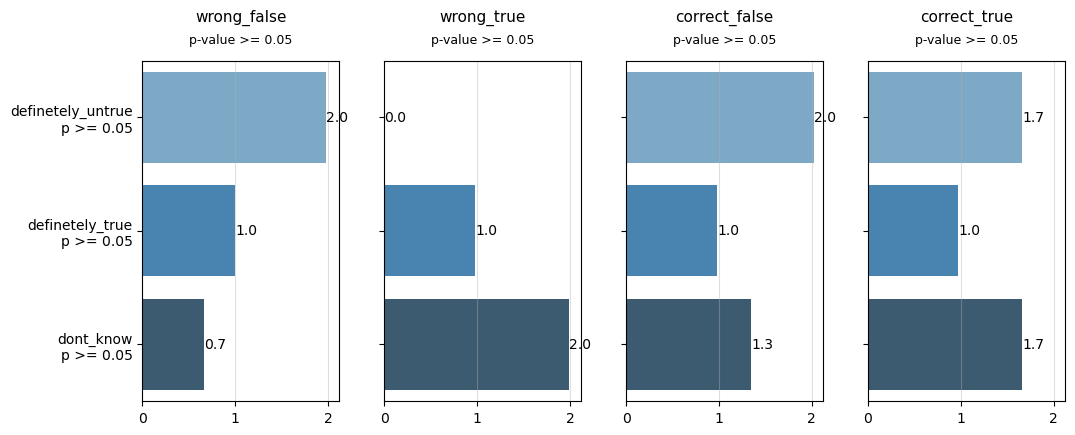

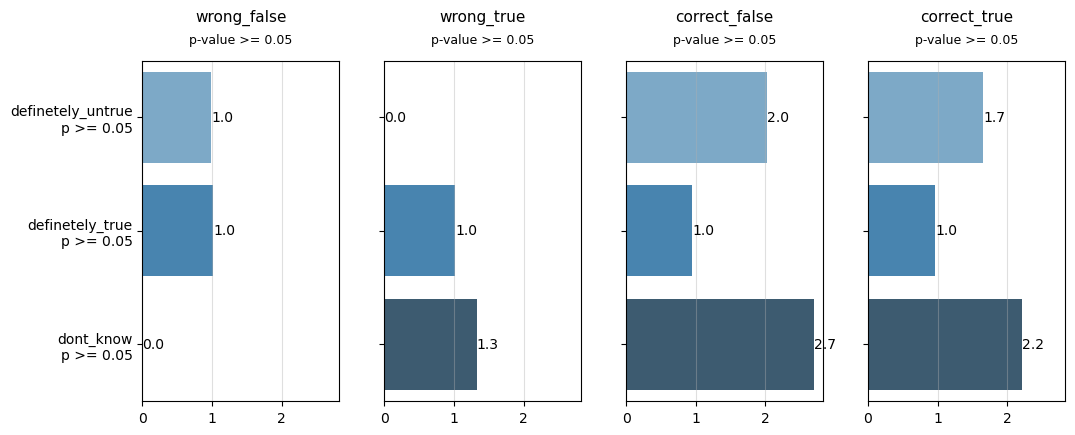

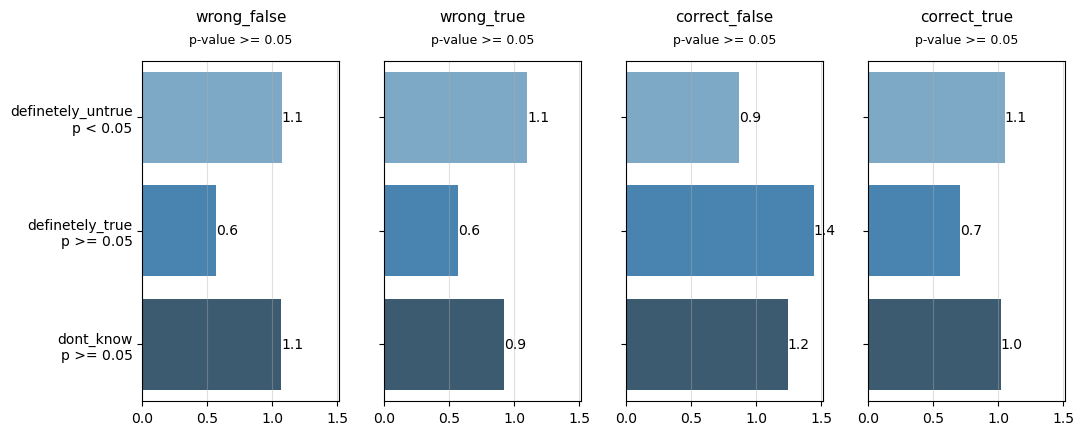

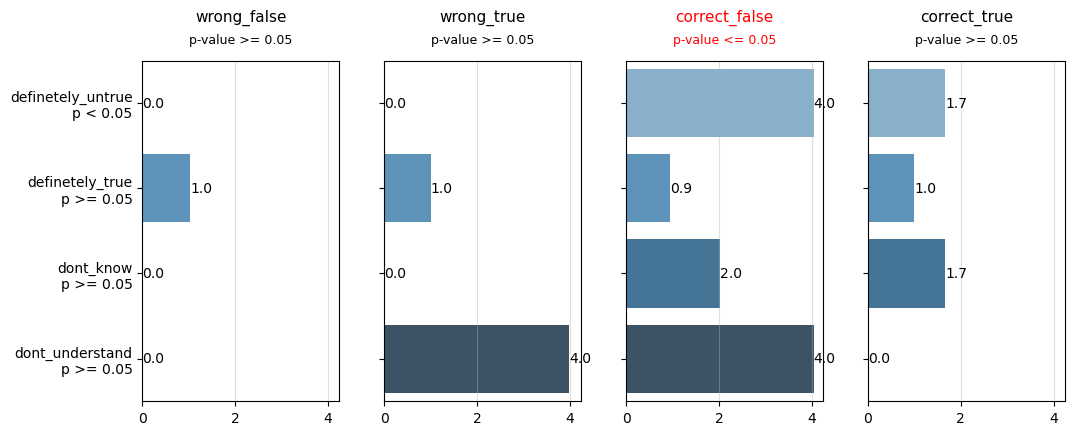

In [105]:
for dimensione in dimensioni_da_analizzare:
    crea_barplot_all_rapporto(raccoglitore_dimensioni,upper_pvalue,inner_pvalue, dimensione,"label",inverted_axes = True)

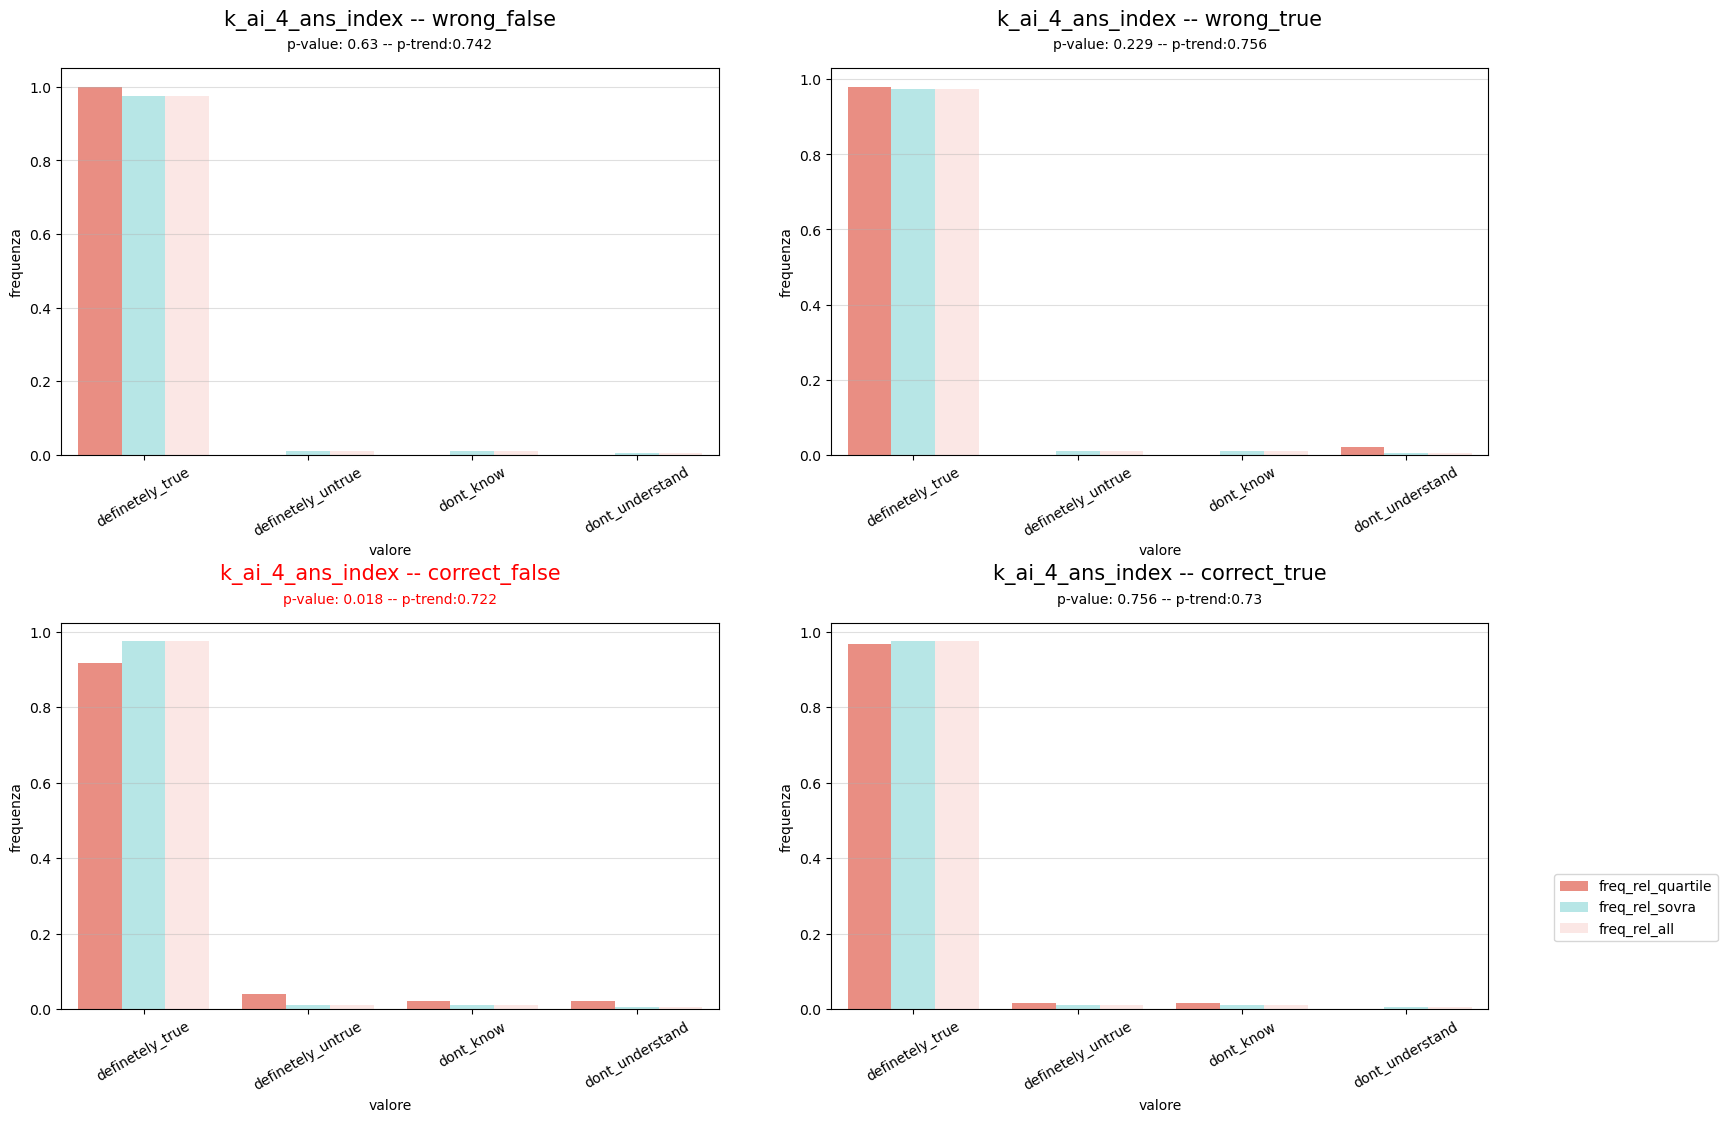

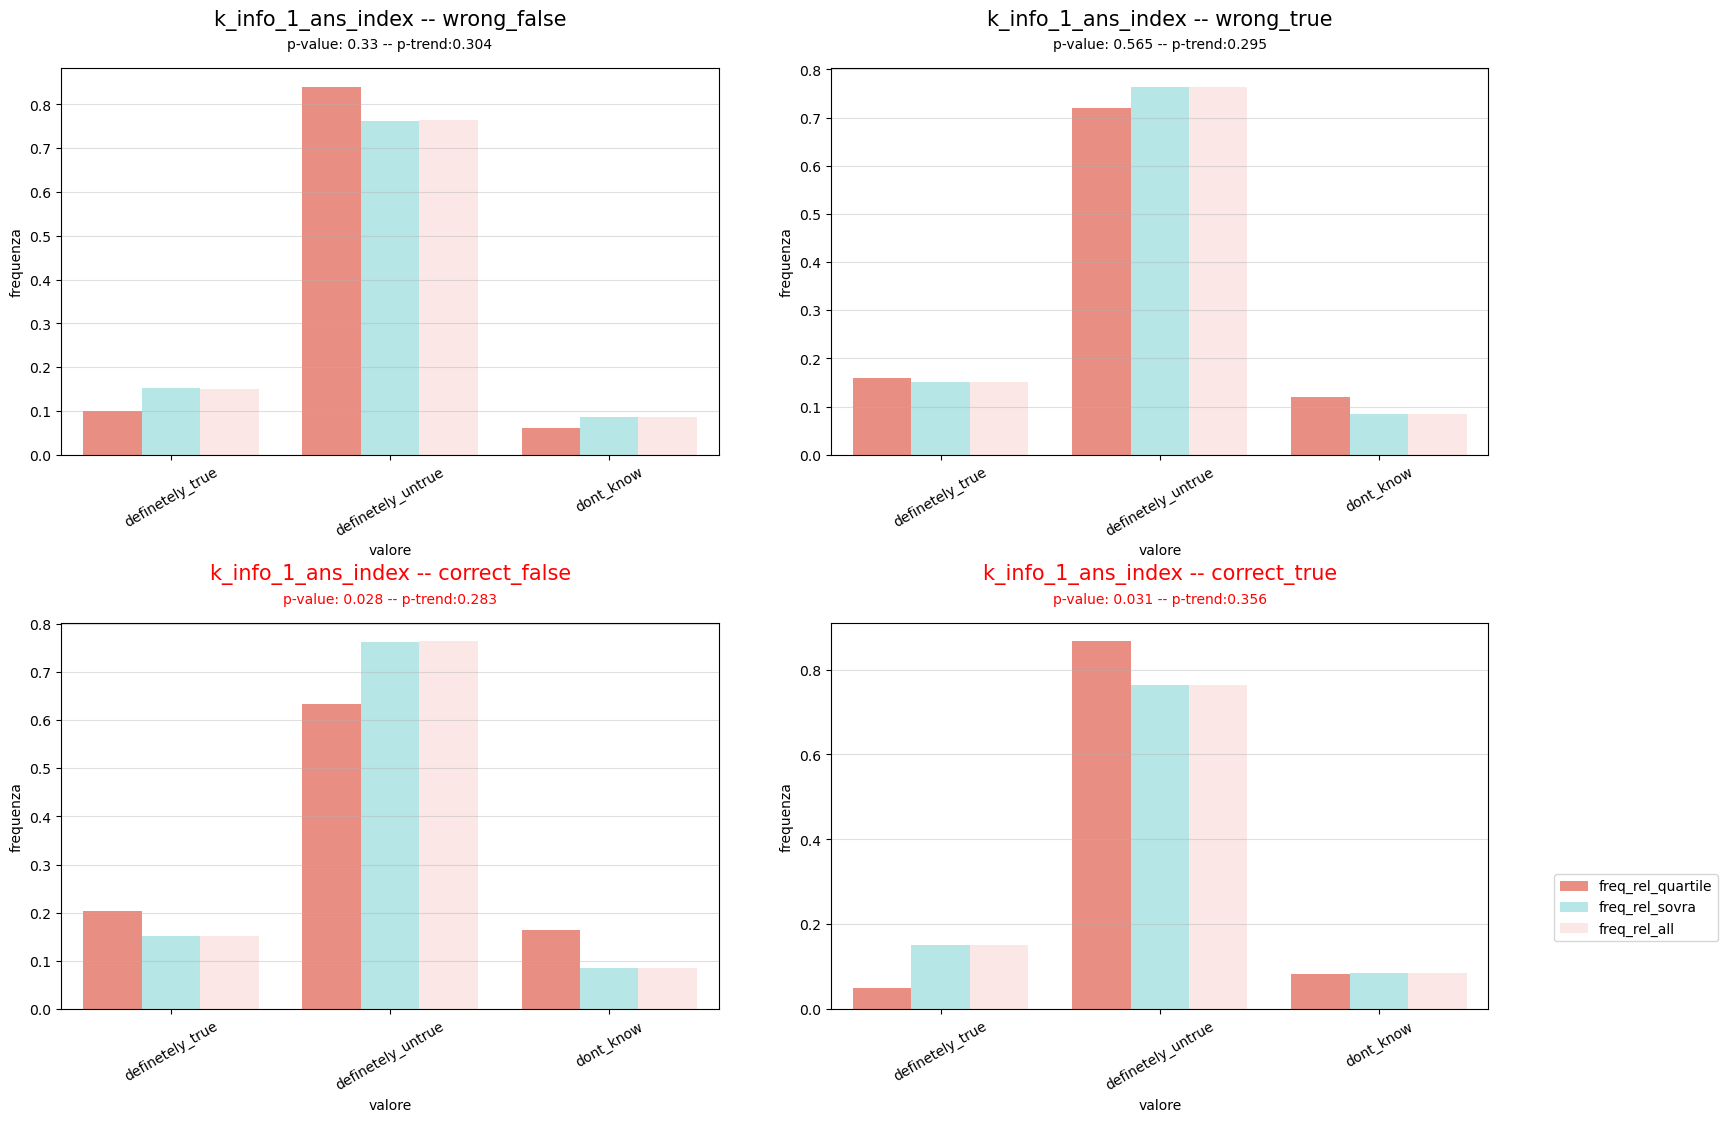

In [106]:
for dimensione in significativi["dimensione"].unique():
    crea_barplot_all(raccoglitore_dimensioni,tabella_p_value, dimensione,"label")

## confronto gruppi

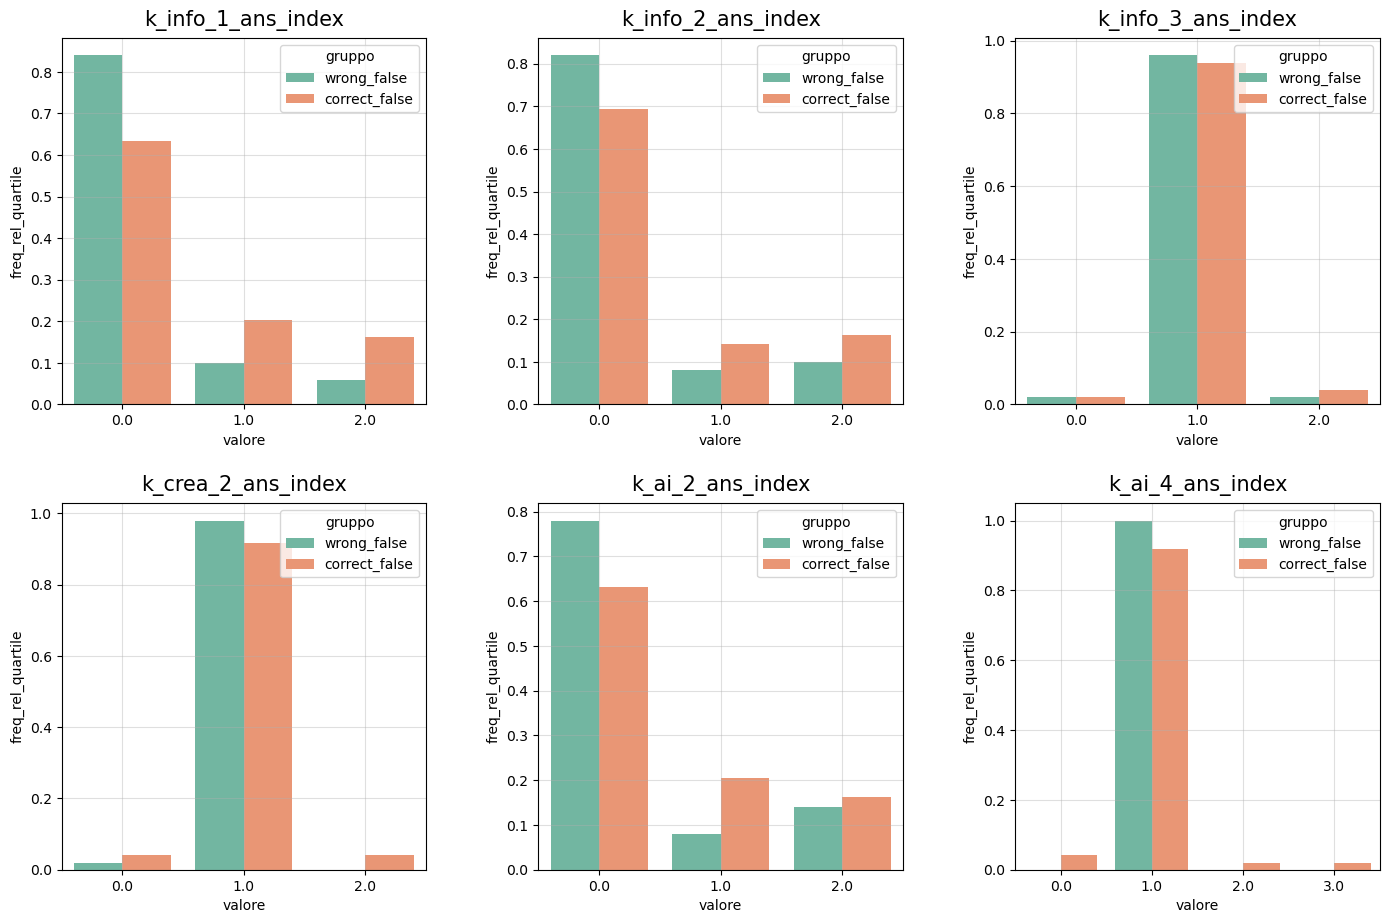

In [107]:
gruppo = ["wrong_false", "correct_false"]
crea_barplot_gruppi_quartili(raccoglitore_dimensioni,dimensioni_da_analizzare,gruppo,label=True)

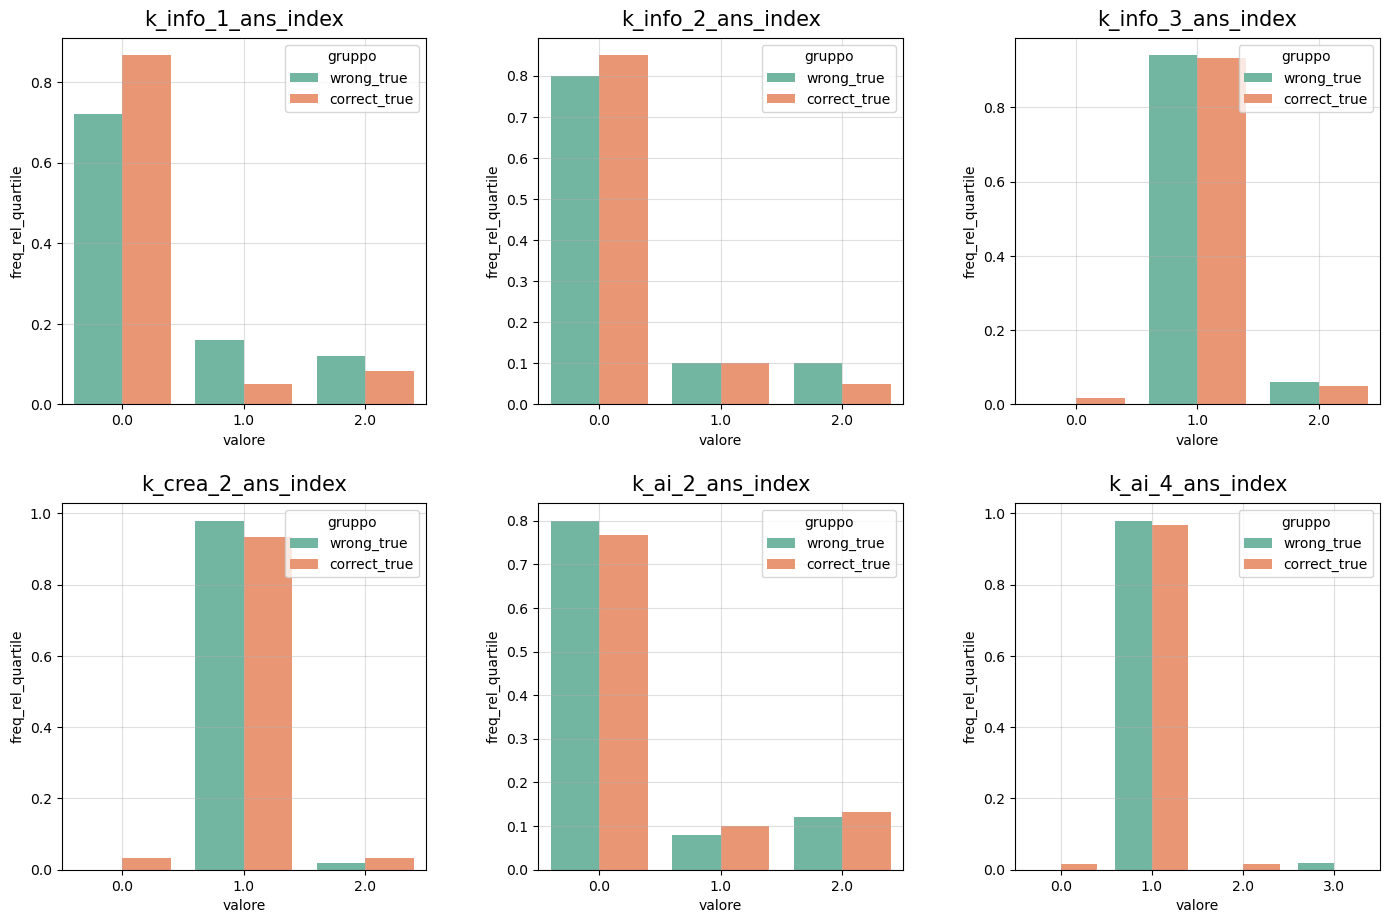

In [108]:
gruppo = ["wrong_true", "correct_true"]
crea_barplot_gruppi_quartili(raccoglitore_dimensioni,dimensioni_da_analizzare,gruppo,label=True)

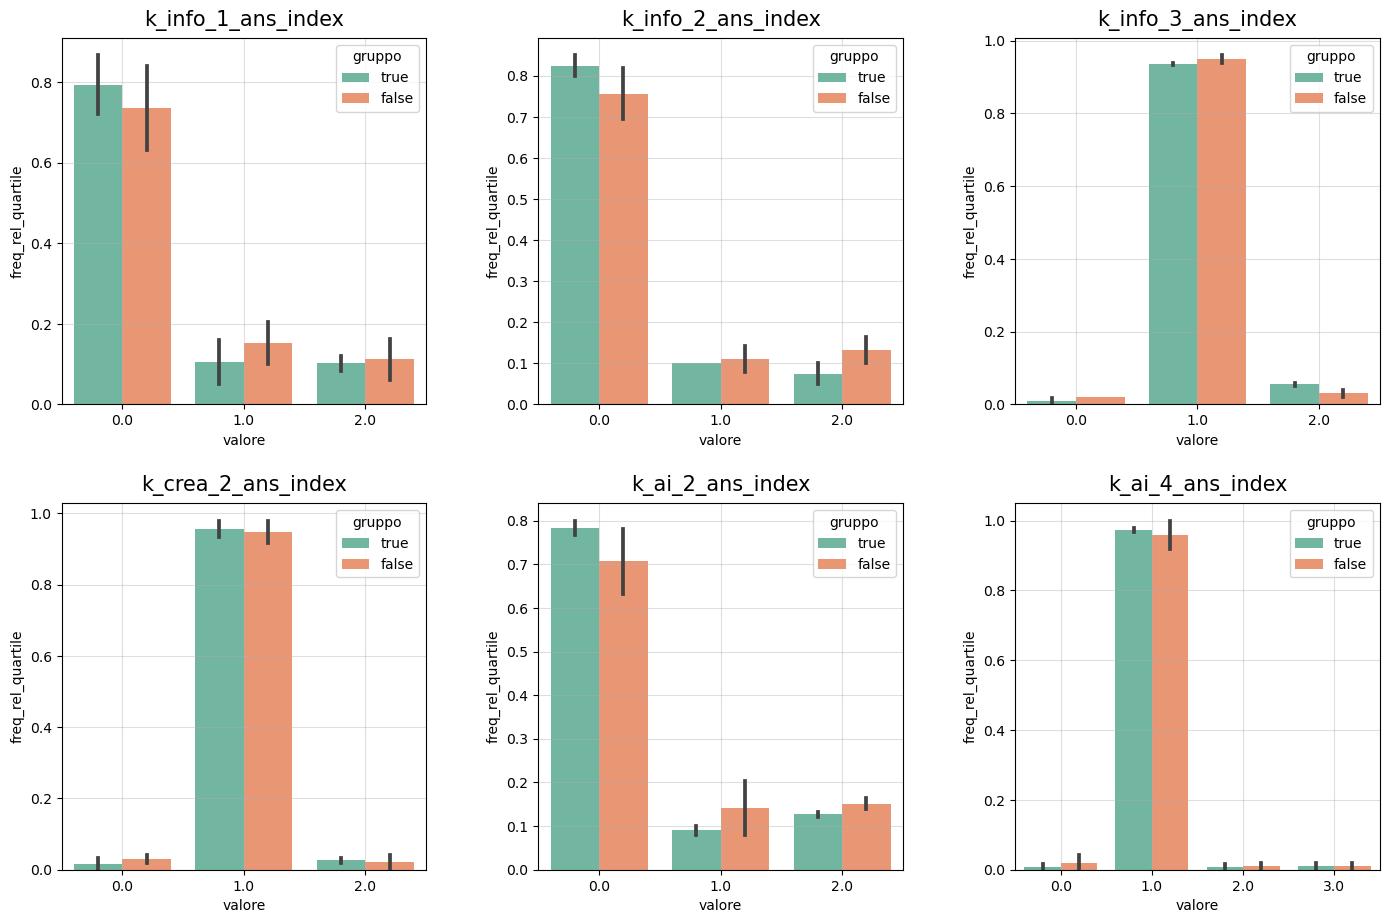

In [109]:
gruppo = [["wrong_true", "correct_true"],["wrong_false", "correct_false"]]
crea_barplot_gruppi_quartili(raccoglitore_dimensioni,dimensioni_da_analizzare,gruppo,label = True,names = ["true","false"])

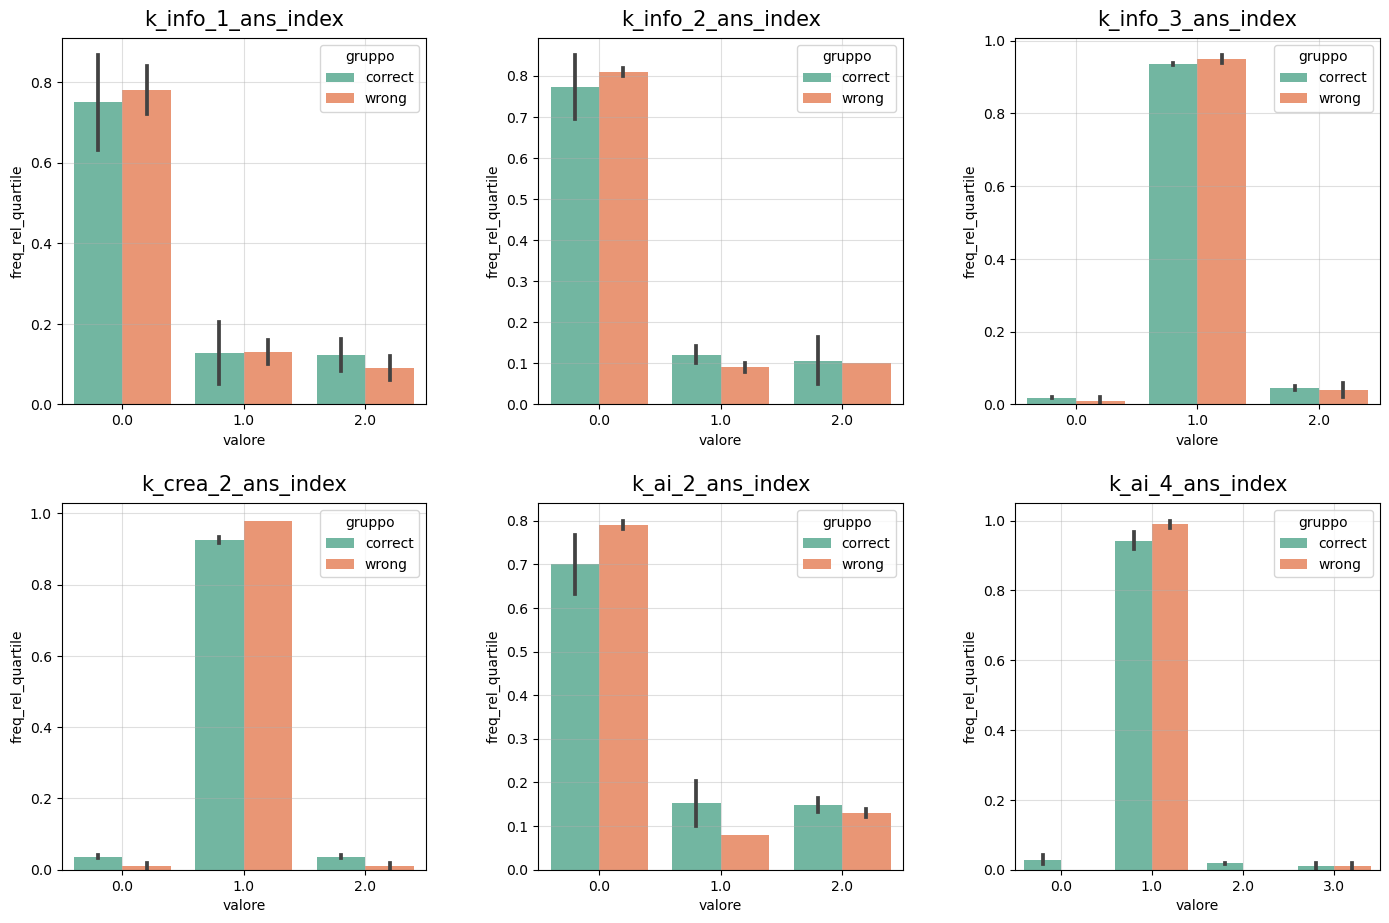

In [110]:
gruppo = [["correct_false", "correct_true"],["wrong_false", "wrong_true"]]
crea_barplot_gruppi_quartili(raccoglitore_dimensioni,dimensioni_da_analizzare,gruppo,label = True,names = ["correct","wrong"])

raggruppo i quartili in gruppi per vedere se c'è una significativa presenza/assenza di valori in questi gruppi:
- gruppo 1 => wrong vs correct


In [111]:
gruppi_quartili = [["correct_false", "correct_true"],["wrong_false", "wrong_true"]]
name_gruppi = ["correct","wrong"]
calcola_p_value_gruppi_quartili(raccoglitore_dimensioni, dimensioni_da_analizzare, gruppi_quartili,label = True, name_gruppi = name_gruppi, solo_significativi = False)

correct k_info_1_ans_index 0.30192085225802506
wrong k_info_1_ans_index 0.8271220241780499
correct k_info_2_ans_index 0.7893559847031046
wrong k_info_2_ans_index 0.3116241498221332
correct k_info_3_ans_index 0.3924227844900223
wrong k_info_3_ans_index 0.835283417690144
correct k_crea_2_ans_index 0.06287596040982367
wrong k_crea_2_ans_index 0.6808574955099059
correct k_ai_2_ans_index 0.8412972146809965
wrong k_ai_2_ans_index 0.1794214178071097
correct k_ai_4_ans_index 0.17349988959570437
wrong k_ai_4_ans_index 0.43051194298506024


- gruppo 2 => true vs false

In [112]:
gruppi_quartili = [["correct_true", "wrong_true"],["wrong_false", "correct_false"]]
name_gruppi = ["true","false"]
calcola_p_value_gruppi_quartili(raccoglitore_dimensioni, dimensioni_da_analizzare, gruppi_quartili,label = True, name_gruppi = name_gruppi, solo_significativi = False)

true k_info_1_ans_index 0.2742952595237009
false k_info_1_ans_index 0.6293904497378444
true k_info_2_ans_index 0.2543972544772827
false k_info_2_ans_index 0.3453711011744202
true k_info_3_ans_index 0.29154519863805256
false k_info_3_ans_index 0.5722941653722812
true k_crea_2_ans_index 0.5411529034957303
false k_crea_2_ans_index 0.6804217658850895
true k_ai_2_ans_index 0.26856406227051893
false k_ai_2_ans_index 0.8092264835031684
true k_ai_4_ans_index 0.9359598519092702
false k_ai_4_ans_index 0.6408935812685803


### Regressione

In [113]:
dimensioni_da_analizzare_per_regressione_3 = ["k_info_1_ans_index","k_info_2_ans_index","k_info_3_ans_index","k_crea_2_ans_index","k_ai_2_ans_index",
                                             "k_ai_4_ans_index"]

\centering
\begin{subfigure}{.85\linewidth}
\centering
\includegraphics[width=\linewidth]{tesi/media/new/regressione_k_info_1_ans_index.png}
\caption{Analisi di regressione lineare della dimensione k_info_1_ans}
\label{cap:regressione_lineare_k_info_1_ans}
\end{subfigure}
\centering
\begin{subfigure}{.85\linewidth}
\centering
\includegraphics[width=\linewidth]{tesi/media/new/regressione_k_info_2_ans_index.png}
\caption{Analisi di regressione lineare della dimensione k_info_2_ans}
\label{cap:regressione_lineare_k_info_2_ans}
\end{subfigure}
\centering
\begin{subfigure}{.85\linewidth}
\centering
\includegraphics[width=\linewidth]{tesi/media/new/regressione_k_info_3_ans_index.png}
\caption{Analisi di regressione lineare della dimensione k_info_3_ans}
\label{cap:regressione_lineare_k_info_3_ans}
\end{subfigure}
\centering
\begin{subfigure}{.85\linewidth}
\centering
\includegraphics[width=\linewidth]{tesi/media/new/regressione_k_crea_2_ans_index.png}
\caption{Analisi di regressione lineare 

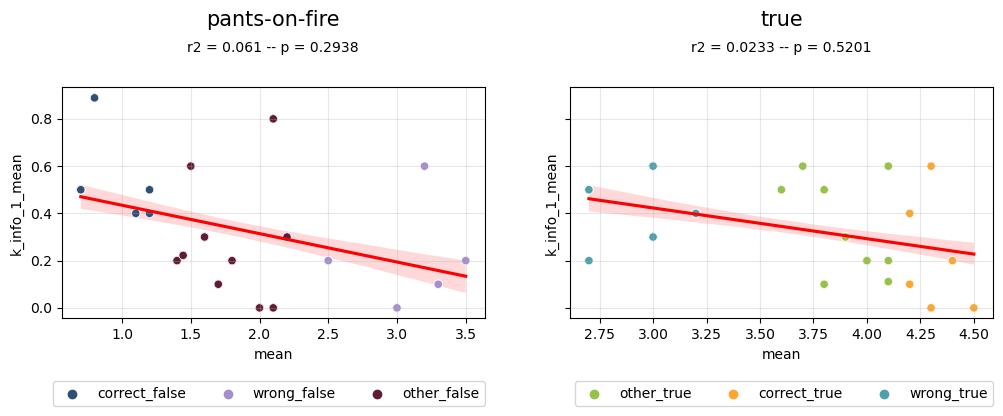

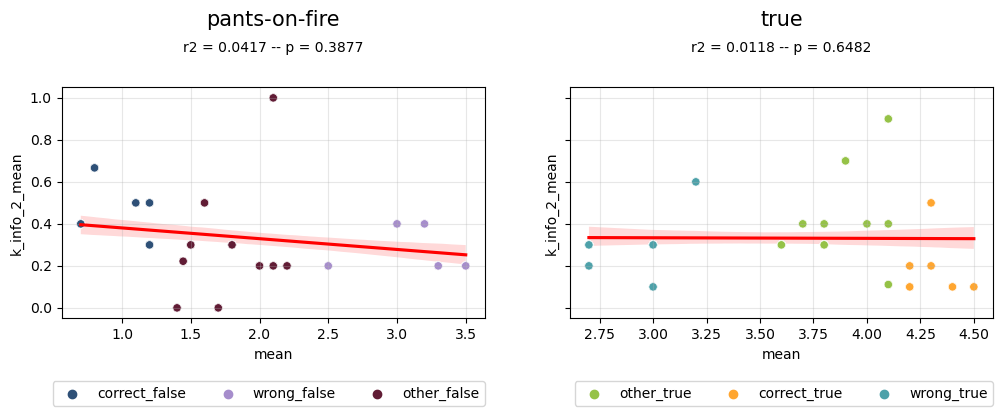

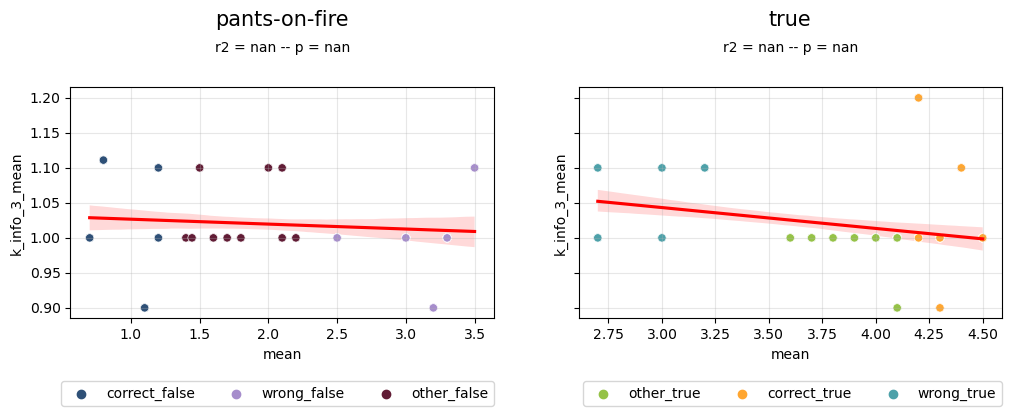

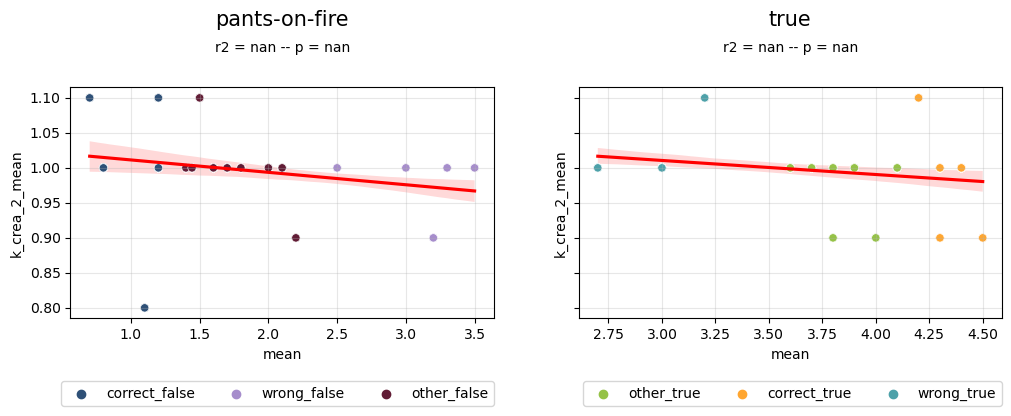

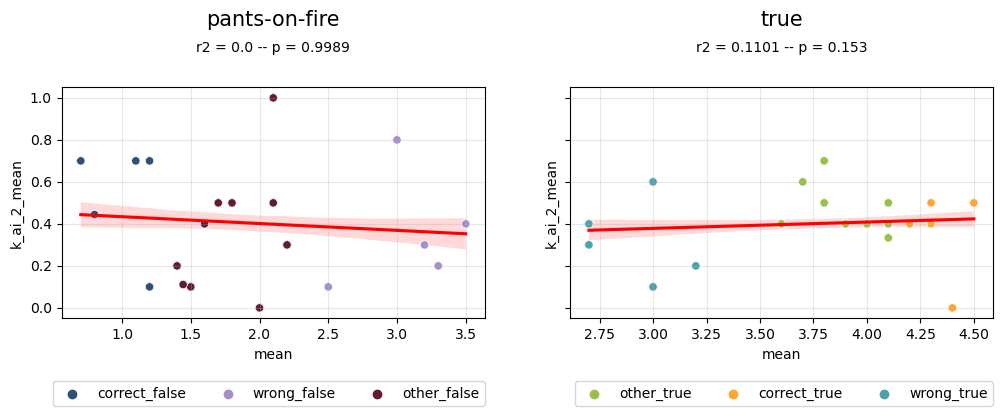

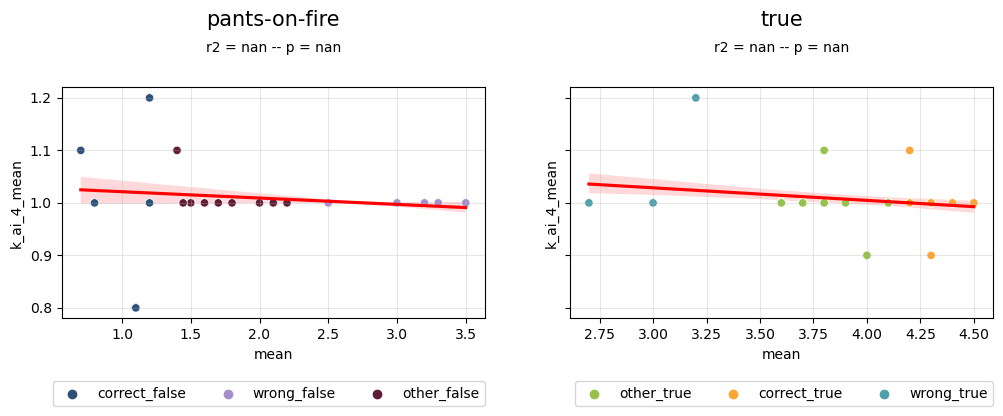

In [114]:
sub = df_for_Q1[df_for_Q1["sovra"] != "other"]

for dimensione in dimensioni_da_analizzare_per_regressione_3:
    sub[dimensione[:-10]+"_mean"] = 0

for statement in sub["doc_id"].unique():
    #sovra = sub[sub["doc_id"] == statement]["sovra"].unique()[0]  
    for dim in dimensioni_da_analizzare_per_regressione_3:
        mean = np.asarray(sub[sub["doc_id"] == statement][dim],dtype = np.float64).mean()
        df_for_Q1.loc[df_for_Q1["doc_id"] == statement, dim[:-10]+"_mean"] = mean 
        
plot_regressione_lineare_RQ(df_for_Q1,dimensioni_da_analizzare_per_regressione_3,10)

## Analisi scarto medio

In [115]:
analizza_scarto(df_for_Q1,quartili,dimensioni_da_analizzare)

quartile vs all =>  k_info_1_ans_index correct_false -> 0.03235791116769666
quartile vs sovra =>  k_info_3_ans_index correct_false -> 4.10946215291646e-06
quartile vs sovra =>  k_info_3_ans_index wrong_true -> 0.0027893146311489766
quartile vs all =>  k_info_3_ans_index wrong_true -> 0.013031051941733386
quartile vs sovra =>  k_crea_2_ans_index correct_false -> 0.034623977337485345
quartile vs sovra =>  k_crea_2_ans_index wrong_true -> 6.6090401831693056e-12
quartile vs sovra =>  k_ai_4_ans_index wrong_false -> 0.0008385613547168949
quartile vs all =>  k_ai_4_ans_index wrong_false -> 7.413319346121931e-05
quartile vs sovra =>  k_ai_4_ans_index wrong_true -> 0.0019706435792220768
quartile vs all =>  k_ai_4_ans_index wrong_true -> 1.6677031325103033e-17
quartile vs all =>  k_ai_4_ans_index correct_true -> 0.0028229130743707117


## Worker medio

In [116]:
df_worker_medio = []
for col in colonne:
    if col[-5:] == "index":
        mean = np.asarray(df_for_Q1[col],dtype = np.float64).mean()
        df_worker_medio.append([col[:-10], mean, mapping[col[:-10]][str(round(mean))+".0"]])
        
df_worker_medio = pd.DataFrame(df_worker_medio, columns = ["dimensione","media","label"])
df_worker_medio

dimensione     media              label
0               age  2.728416              36-50
1            school  2.920369  Bachelor’s degree
2             taxes  5.221291            50-75k$
3   political_views  2.497904           Moderate
4     consideration  1.109807           Democrat
5   southern_border  0.879296           Disagree
6          s_info_1  3.683152    completely_true
7       s_info_3_v2  3.813915    completely_true
8          s_info_4  3.808885    completely_true
9          s_info_5  3.466890      slightly_true
10         s_info_6  3.391450      slightly_true
11         s_info_7  3.577536    completely_true
12       s_com_1_v2  3.331098      slightly_true
13          s_com_2  3.592624    completely_true
14         k_info_1  0.321878  definetely_untrue
15         k_info_2  0.331936  definetely_untrue
16         k_info_3  1.020117    definetely_true
17         k_crea_2  0.994971    definetely_true
18           k_ai_2  0.402347  definetely_untrue
19           k_ai_4  1.010059    definetely_true
20      environment  0.236379              Agree
21           s_ai_1  2.878458      slightly_true
22           s_ai_2  3.104778      slightly_true
23           s_ai_6  2.707460      slightly_true

In [117]:
for quartile in quartili:
    df_worker_medio = []
    for col in colonne:
        if col[-5:] == "index":
            mean = np.asarray(df_for_Q1[df_for_Q1["quartile"] == quartile][col],dtype = np.float64).mean()
            df_worker_medio.append([col[:-10], mean, mapping[col[:-10]][str(round(mean))+".0"]])
        
    df_worker_medio = pd.DataFrame(df_worker_medio, columns = ["dimensione","media","label"])
    print(quartile)
    display(df_worker_medio)

wrong_false


dimensione  media                    label
0               age   2.84                    36-50
1            school   3.00        Bachelor’s degree
2             taxes   4.92                  50-75k$
3   political_views   2.52                  Liberal
4     consideration   1.12                 Democrat
5   southern_border   0.88                 Disagree
6          s_info_1   3.54          completely_true
7       s_info_3_v2   3.80          completely_true
8          s_info_4   3.60          completely_true
9          s_info_5   3.34            slightly_true
10         s_info_6   3.36            slightly_true
11         s_info_7   3.56          completely_true
12       s_com_1_v2   3.08            slightly_true
13          s_com_2   3.46            slightly_true
14         k_info_1   0.22        definetely_untrue
15         k_info_2   0.28        definetely_untrue
16         k_info_3   1.00          definetely_true
17         k_crea_2   0.98          definetely_true
18           k_ai_2   0.36        definetely_untrue
19           k_ai_4   1.00          definetely_true
20      environment   0.32                    Agree
21           s_ai_1   2.62            slightly_true
22           s_ai_2   2.96            slightly_true
23           s_ai_6   2.44  not_true_and_not_untrue

correct_false


dimensione     media              label
0               age  2.714286              36-50
1            school  2.836735  Bachelor’s degree
2             taxes  5.122449            50-75k$
3   political_views  2.428571           Moderate
4     consideration  0.979592           Democrat
5   southern_border  0.775510           Disagree
6          s_info_1  3.755102    completely_true
7       s_info_3_v2  3.938776    completely_true
8          s_info_4  3.897959    completely_true
9          s_info_5  3.653061    completely_true
10         s_info_6  3.489796      slightly_true
11         s_info_7  3.612245    completely_true
12       s_com_1_v2  3.469388      slightly_true
13          s_com_2  3.653061    completely_true
14         k_info_1  0.530612    definetely_true
15         k_info_2  0.469388  definetely_untrue
16         k_info_3  1.020408    definetely_true
17         k_crea_2  1.000000    definetely_true
18           k_ai_2  0.530612    definetely_true
19           k_ai_4  1.020408    definetely_true
20      environment  0.285714              Agree
21           s_ai_1  3.000000      slightly_true
22           s_ai_2  3.163265      slightly_true
23           s_ai_6  2.918367      slightly_true

wrong_true


dimensione  media              label
0               age   2.78              36-50
1            school   2.76  Bachelor’s degree
2             taxes   5.36            50-75k$
3   political_views   2.50           Moderate
4     consideration   1.12           Democrat
5   southern_border   0.96           Disagree
6          s_info_1   3.62    completely_true
7       s_info_3_v2   3.82    completely_true
8          s_info_4   3.82    completely_true
9          s_info_5   3.38      slightly_true
10         s_info_6   3.26      slightly_true
11         s_info_7   3.62    completely_true
12       s_com_1_v2   3.30      slightly_true
13          s_com_2   3.72    completely_true
14         k_info_1   0.40  definetely_untrue
15         k_info_2   0.30  definetely_untrue
16         k_info_3   1.06    definetely_true
17         k_crea_2   1.02    definetely_true
18           k_ai_2   0.32  definetely_untrue
19           k_ai_4   1.04    definetely_true
20      environment   0.26              Agree
21           s_ai_1   3.10      slightly_true
22           s_ai_2   3.30      slightly_true
23           s_ai_6   3.00      slightly_true

correct_true


dimensione     media              label
0               age  2.600000              36-50
1            school  2.983333  Bachelor’s degree
2             taxes  5.550000           75-100k$
3   political_views  2.583333            Liberal
4     consideration  1.233333           Democrat
5   southern_border  0.816667           Disagree
6          s_info_1  3.700000    completely_true
7       s_info_3_v2  3.733333    completely_true
8          s_info_4  3.866667    completely_true
9          s_info_5  3.516667    completely_true
10         s_info_6  3.383333      slightly_true
11         s_info_7  3.483333      slightly_true
12       s_com_1_v2  3.150000      slightly_true
13          s_com_2  3.600000    completely_true
14         k_info_1  0.216667  definetely_untrue
15         k_info_2  0.200000  definetely_untrue
16         k_info_3  1.033333    definetely_true
17         k_crea_2  1.000000    definetely_true
18           k_ai_2  0.366667  definetely_untrue
19           k_ai_4  1.000000    definetely_true
20      environment  0.216667              Agree
21           s_ai_1  2.783333      slightly_true
22           s_ai_2  2.983333      slightly_true
23           s_ai_6  2.533333      slightly_true

In [118]:
df_worker_medio = []
for col in colonne:
    if col[-5:] == "index":
        mean = np.asarray(df_for_Q1[col],dtype = np.float64).mean()
        df_worker_medio.append([col[:-10], mean, mapping[col[:-10]][str(round(mean))+".0"]])
        
df_worker_medio = pd.DataFrame(df_worker_medio, columns = ["dimensione","media","label"])
df_worker_medio

dimensione     media              label
0               age  2.728416              36-50
1            school  2.920369  Bachelor’s degree
2             taxes  5.221291            50-75k$
3   political_views  2.497904           Moderate
4     consideration  1.109807           Democrat
5   southern_border  0.879296           Disagree
6          s_info_1  3.683152    completely_true
7       s_info_3_v2  3.813915    completely_true
8          s_info_4  3.808885    completely_true
9          s_info_5  3.466890      slightly_true
10         s_info_6  3.391450      slightly_true
11         s_info_7  3.577536    completely_true
12       s_com_1_v2  3.331098      slightly_true
13          s_com_2  3.592624    completely_true
14         k_info_1  0.321878  definetely_untrue
15         k_info_2  0.331936  definetely_untrue
16         k_info_3  1.020117    definetely_true
17         k_crea_2  0.994971    definetely_true
18           k_ai_2  0.402347  definetely_untrue
19           k_ai_4  1.010059    definetely_true
20      environment  0.236379              Agree
21           s_ai_1  2.878458      slightly_true
22           s_ai_2  3.104778      slightly_true
23           s_ai_6  2.707460      slightly_true

## Salvo Dati

In [119]:
df_for_Q1.to_csv(index=False, path_or_buf = "../Datasets/df_Q1.csv")